In [1]:
using HDF5, PyPlot, Glob, CSV, DataFrames, Dates, Distributions, GLM, StatsBase, MAT, NaNStatistics

In [102]:
drv = "/mnt/a82d7171-92f9-48ad-9ba4-aea036c8fec8/data_storage/collabs/maya/oddball/silent_gap/"
outpath = drv*"output/"
file_list = glob("*mat",drv)
fps = 4
colors=[[241, 106, 5],[82, 121, 111],[165, 0, 43],[79, 53, 155]]./255
fs = 16
ymn = 300
ymx = 1270
xmn = 0
xmx = 600

600

In [3]:
file_list


5-element Vector{String}:
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 42 bytes ⋯ "ll/silent_gap/Stimuli_500ms.mat"
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 47 bytes ⋯ "lent_gap/idx_plane_500msISI.mat"
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 53 bytes ⋯ "ap/pipeline_output_500msISI.mat"
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 48 bytes ⋯ "ent_gap/raw_traces_500msISI.mat"
 "/mnt/a82d7171-92f9-48ad-9ba4-ae" ⋯ 46 bytes ⋯ "ilent_gap/stimtrain_0.5sISI.mat"

In [4]:
#1 ISI 
pnum = 3
rnum = 4
snum = 5
isi = Int.(0.5*fps)

2

In [5]:
pipeline_output = h5open(file_list[pnum],"r")
raw_traces = h5open(file_list[rnum],"r")

IJulia.clear_output()

0

In [6]:
keys(pipeline_output)

6-element Vector{String}:
 "#refs#"
 "DF"
 "ROI_centroids"
 "fish_ncells"
 "fish_numbers"
 "idx_fish"

In [7]:
centroids = pipeline_output["ROI_centroids"][]
idx_fish = pipeline_output["idx_fish"][]
IJulia.clear_output()

0

In [8]:
file = matopen(file_list[snum],"r")
keys(file)

1-element Vector{String}:
 "stimtrain"

In [9]:
#framerate = read(file,"framerate")
file = matopen(file_list[snum],"r")
keys(file)
stimtrain = read(file,"stimtrain")

file = matopen(file_list[1],"r")
stim_reg = read(file,"Stimuli")[:,2]
#stimtimes = Int.(stimtimes)
#stim_seq = vec(read(file,"stim_seq"))
#stim_freqs = vec(read(file,"stim_freqs"))
IJulia.clear_output()

0

In [10]:
start_idx = findfirst(stim_reg .> 0)
n_frames = length(stim_reg)

976

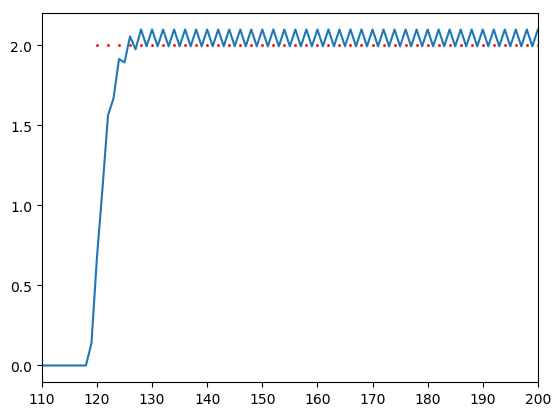

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall /home/stednitz/.julia/packages/PyCall/L0fLP/src/numpy.jl:67


(110, 200)

In [11]:
stimtimes = []

for f = start_idx:isi:n_frames
    append!(stimtimes,f)
end

plot(stim_reg)
scatter(stimtimes,zeros(length(stimtimes)).+2,s=1,color="red")
xlim(110,200)

In [12]:
keys(raw_traces)

1-element Vector{String}:
 "raw_traces"

In [13]:
DF = pipeline_output["DF"][]
raw = raw_traces["raw_traces"][]

150413×976 Matrix{Float32}:
 1601.58   1530.15   1578.57   1589.92   …  1400.56   1424.94   1412.74
 1649.44   1611.84   1778.71   1752.51      1608.27   1581.21   1580.29
 1583.21   1523.85   1578.48   1584.83      1396.81   1410.65   1400.89
 1785.96   1697.08   1814.1    1877.27      1780.91   1707.04   1733.15
 1562.93   1395.58   1510.11   1580.95      1372.76   1368.63   1346.6
 1313.28   1330.63   1323.14   1326.87   …  1252.55   1253.68   1263.11
 1607.44   1592.11   1661.82   1622.01      1511.21   1505.97   1497.69
 1428.95   1389.96   1439.72   1441.6       1382.43   1363.09   1383.98
 1643.03   1674.09   1766.25   1758.15      1538.98   1520.63   1537.86
 1464.96   1409.76   1467.25   1463.8       1370.62   1344.07   1343.32
 1455.15   1432.54   1452.51   1462.64   …  1372.6    1374.57   1370.78
 1487.88   1543.49   1539.38   1526.33      1459.27   1460.71   1460.45
 1490.91   1458.66   1473.05   1489.36      1376.93   1371.45   1368.76
    ⋮                                

In [14]:
size(DF)

(150413, 976)

In [15]:
size(raw)

(150413, 976)

In [16]:
!isnan(NaN)

false

In [17]:
zscore = zeros(size(raw))

for r = 1:size(raw)[1]
    trace = raw[r,:]
    avg = nanmean(trace[60:end])
    stdev = nanstd(trace[60:end])
    if (!isnan(avg) == true) && (!isnan(stdev) == true)
        if stdev > 0
            zscore[r,:] .= (trace .- avg) ./ stdev
        else
            zscore[r,:] .= (trace .- avg)
        end
    end
end

DF = zscore

150413×976 Matrix{Float64}:
  1.63325     0.679517    1.3261    …  -1.05104     -0.725451   -0.88841
  0.933729    0.141874    3.65612       0.0667173   -0.503155   -0.522559
  1.25083     0.478246    1.18929      -1.17539     -0.995266   -1.12222
  0.800085   -0.307922    1.15084       0.737085    -0.183824    0.141679
  4.10535     0.0580755   2.82804      -0.493724    -0.593644   -1.12636
  0.714219    1.20129     0.990999  …  -0.991085    -0.959172   -0.694449
  1.73918     1.37151     3.04367      -0.568946    -0.694771   -0.893337
  0.872543   -0.152616    1.15559      -0.350518    -0.858989   -0.309988
  0.131541    0.516527    1.65891      -1.15808     -1.38558    -1.17203
  4.27068     1.67031     4.37836      -0.173712    -1.42452    -1.45998
  1.29801     0.700029    1.22836   …  -0.885128    -0.832976   -0.933268
  0.723891    3.1749      2.9937       -0.536715    -0.473289   -0.484747
  2.28029     1.2603      1.71538      -1.32402     -1.49747    -1.58248
  ⋮             

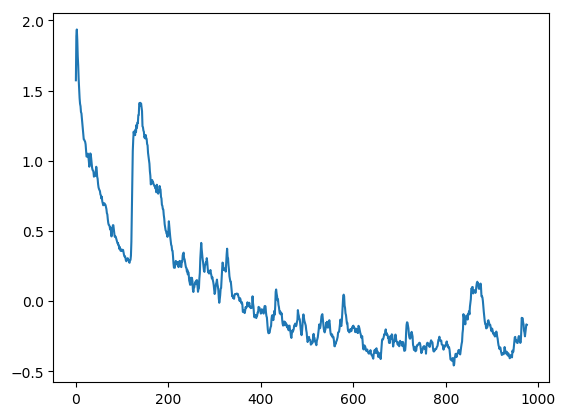

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f7a24995a20>

In [18]:
plot(vec(mean(DF,dims=1)))

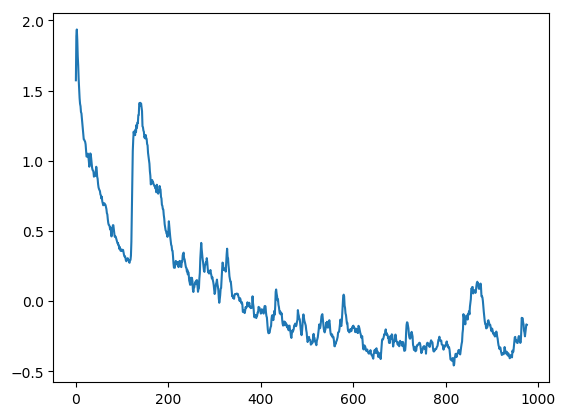

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f79cf63dc88>

In [19]:
#plot(vec(mean(raw,dims=1)).-2200)
plot(vec(mean(DF,dims=1)))

In [20]:
n_frames = length(DF[1,:])
total_rois = length(DF[:,1])

150413

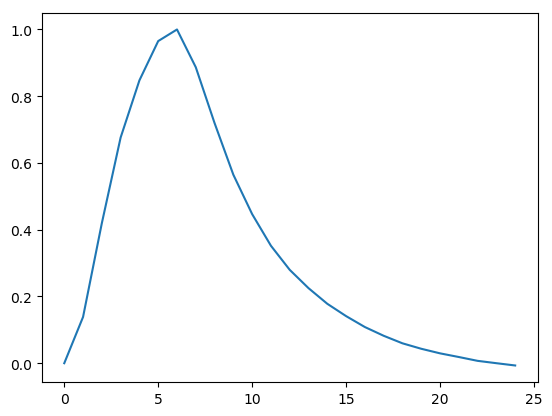

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f79cf61ea90>

In [21]:
spike=[0,1.69644104899772,5.13796058542217,8.27886020152244,10.3756715204800,11.8173714529814,12.2425184714093,10.8571417354877,8.80831829681196,6.91339112244670,5.46959264663869,4.30868766622567,3.42533619066766,2.75378443486879,2.18017250852183,1.72816235135824,1.32732537295463,1.00684435500268,0.730210038304555,0.530242444093118,0.362253250339685,0.227668255288566,0.0869242416152502,0.000718266708050853,-0.0828334873368325]';
spike = vec(spike./maximum(spike))
plot(spike)

In [22]:
length(stimtrain)

430

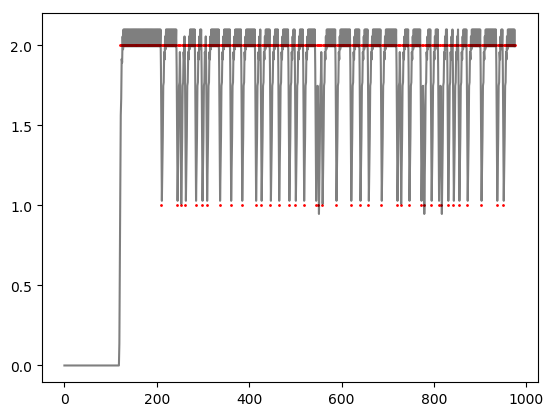

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f78e78d1dd8>

In [23]:
scatter(stimtimes,stimtrain[1:end-1].+1,s=1,color="red")

gap_times = []
noise_times = []
for i = 1:length(stimtimes)
    curr_stim = stimtrain[i]
    if curr_stim == 0
        append!(gap_times,stimtimes[i])
    elseif curr_stim == 1
        append!(noise_times,stimtimes[i])
    end
end

gap_times = Int.(gap_times)
noise_times = Int.(noise_times)

n_gap = length(stimtrain[stimtrain .== 0])
randtimes = Int.(sample(start_idx:isi*2:n_frames,n_gap,replace=false))

r1 = collect(start_idx:isi*2:n_frames)
filter!(r1->r1∉gap_times,r1)

gap_offset = sort(sample(r1, n_gap, replace=false))
after_gap_times = Int.(gap_times .+ isi)

plot(stim_reg,color="black",alpha=0.5)

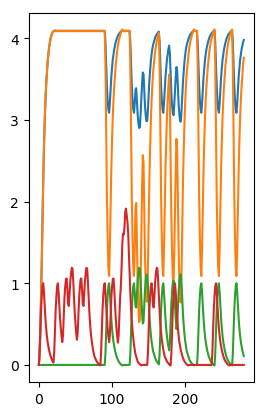

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f78e783d4e0>

In [24]:
#number of frames to offset oddball
offset = 24

function compute_calcium(times)
    reg = zeros((n_frames))
    for stim in times
        nd = stim + length(spike)
        off = 0
        if length(reg) < stim+length(spike) 
            off = nd - length(reg)
            nd = length(reg)
        end
        reg[stim:nd-1] .+= spike[1:end-off]
    end
    return reg
end

auditory_reg = compute_calcium(noise_times)
gap_reg = compute_calcium(gap_times)
after_gap_reg = compute_calcium(after_gap_times)
gap_offset_reg = compute_calcium(gap_offset)
random_reg = compute_calcium(randtimes)
post_gap_bump_reg = auditory_reg .+ after_gap_reg
suppression_reg = auditory_reg .- (gap_reg*2)

subplot(121)
rng = 120:400
plot(auditory_reg[rng])
plot(suppression_reg[rng])
plot(gap_reg[rng])
plot(gap_offset_reg[rng])
#plot(after_gap_reg[rng])

In [25]:
isi

2

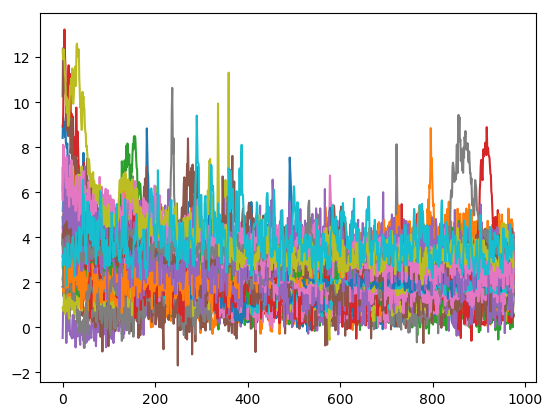

In [26]:
ctr = 1

for i = Int.(rand(1:total_rois,30))
    plot(DF[i,:].+ctr)
    ctr += 0.1
end

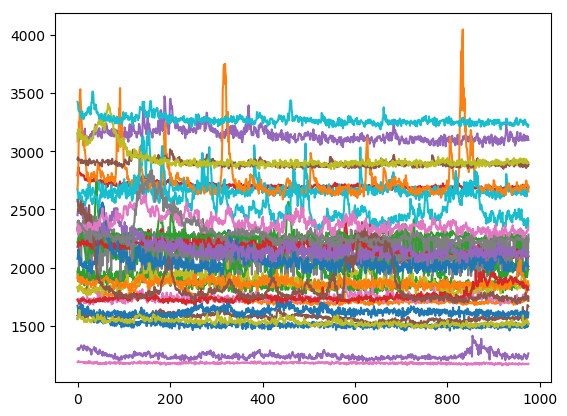

In [27]:
for i = Int.(rand(1:total_rois,30))
    plot(raw[i,:].+ctr)
    ctr += 0.1
end

In [28]:
exp_regs = [stim_reg,gap_reg,gap_offset_reg,random_reg,after_gap_reg,suppression_reg]
reg_titles = ["auditory","gap","gap_offset","random","after_gap","suppression"]

6-element Vector{String}:
 "auditory"
 "gap"
 "gap_offset"
 "random"
 "after_gap"
 "suppression"

## Compute regression

In [31]:
coeffs = Array{Float32}(undef,length(exp_regs),total_rois); fill!(coeffs,NaN)
r2s = Array{Float32}(undef,length(exp_regs),total_rois); fill!(r2s,NaN)
pvals = Array{Float32}(undef,length(exp_regs),total_rois); fill!(pvals,NaN)

t = now()
print("starting $t ...")
for i = 1:total_rois
    reg_ctr = 1
    yr = DF[i,start_idx:end]
    for r = 1:length(exp_regs)
        t = now()
        xr = exp_regs[r][start_idx:end]
        df = DataFrame([yr,xr],["y","x"])
        ols = lm(@formula(y ~ x),df)
        r2s[reg_ctr,i] = r2(ols)
        coeffs[reg_ctr,i] = coef(ols)[2]
        pvals[reg_ctr,i] = coeftable(ols).cols[4][2]
        reg_ctr +=1
    end
end

t = now()
print("...complete $t")

starting 2024-03-07T17:27:17.603 ......complete 2024-03-07T17:28:36.162

### Save regression

In [32]:
short_id = file_list[pnum][length(drv)+17:end-4]
short_id = "gap_500msISI"
outfile = outpath*short_id*".h5"
if isfile(outfile) rm(outfile) end
of = h5open(outfile,"w")

for r=1:length(reg_titles)
    create_group(of,reg_titles[r])
    of[reg_titles[r]]["reg"] = exp_regs[r]
    of[reg_titles[r]]["r2"] = r2s[r,:]
    of[reg_titles[r]]["coef"] = coeffs[r,:]
    of[reg_titles[r]]["pval"] = pvals[r,:]
end

close(of)

In [34]:
total_rois = length(DF[:,1])

150413

In [45]:
#length(exp_regs[1,:])

976

## Read existing data

In [71]:
short_id = file_list[pnum][length(drv)+17:end-4]
short_id = "gap_500msISI"

outfile = outpath*short_id*".h5"

of = h5open(outfile,"r")
coeffs = Array{Float32}(undef,length(reg_titles),total_rois); fill!(coeffs,NaN)
r2s = Array{Float32}(undef,length(reg_titles),total_rois); fill!(r2s,NaN)
pvals = Array{Float32}(undef,length(reg_titles),total_rois); fill!(pvals,NaN)
exp_regs = zeros((length(reg_titles),n_frames))
sig_rois = Array{Int64}[]
nonsig_rois = Array{Int64}[]

for r=1:6#length(exp_regs)
    #exp_regs[r] = of[reg_titles[r]]["reg"][]
    #temp = of[reg_titles[r]]["r2"][]
    r2s[r,:] .= of[reg_titles[r]]["r2"][]
    coeffs[r,:] .= of[reg_titles[r]]["coef"][]
    pvals[r,:] .= of[reg_titles[r]]["pval"][]
    #push!(sig_rois, of[reg_titles[r]]["sig_rois"][])
    #push!(nonsig_rois, of[reg_titles[r]]["nonsig_rois"][])
end
close(of)

## Compute significant ROIs

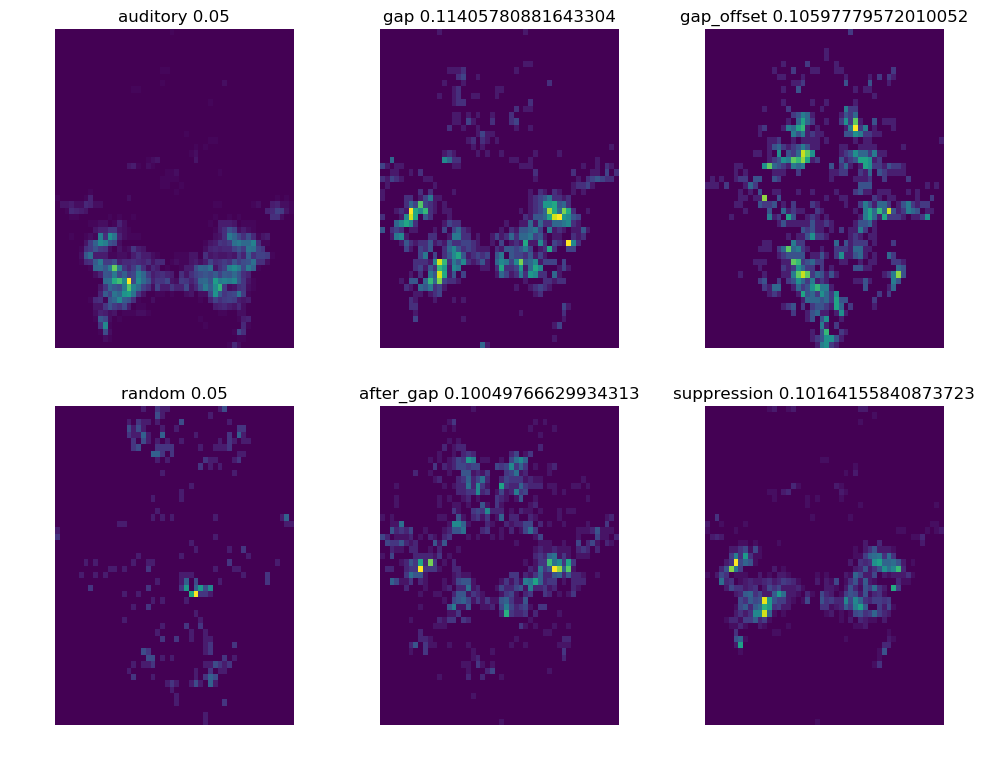

In [72]:
sig_rois = Array{Int64}[]
nonsig_rois = Array{Int64}[]

figure(figsize=(10,15)); 
rows,cols=4,3
alpha_cutoff = 0.05/total_rois
perc_cutoff = 99
minimum_r2 = 0.05#0.1
for r=1:6#length(exp_regs)
    pvals_clean = pvals[r,:]
    sig_roi_pval = findall(pvals_clean .< alpha_cutoff); idx_rest_pval = findall(pvals_clean .>= alpha_cutoff)
    
    r2s_clean = replace(r2s[r,:],NaN=>0)
    perc_99 = percentile(r2s_clean,perc_cutoff)
    if perc_99 < 0.1 perc_99 = minimum_r2 end
    sig_roi_r2 = findall(r2s_clean .> perc_99); idx_rest_r2 = findall(r2s_clean .<= percentile(r2s_clean,perc_99))
    
    sig_roi = intersect(sig_roi_pval,sig_roi_r2)
    nonsig_roi = collect(1:total_rois)
    deleteat!(nonsig_roi,sig_roi[1])
    
    push!(sig_rois,sig_roi)
    push!(nonsig_rois,nonsig_roi)
    subplot(rows,cols,r)
    title(reg_titles[r]*" $perc_99")
    plt.hist2d(centroids[sig_roi,2],centroids[sig_roi,1],bins=50); axis("off");
end

tight_layout()

In [52]:
idx = findall(coeffs[2,:] .< 0)
r2s[2,idx] .= 0

127994-element view(::Matrix{Float32}, 2, [2, 4, 5, 6, 7, 8, 9, 10, 12, 13  …  150401, 150404, 150405, 150406, 150407, 150408, 150409, 150410, 150411, 150413]) with eltype Float32:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [292]:
of = h5open(outfile,"r+")

for r=1:length(exp_regs)
    of[reg_titles[r]]["sig_rois"] = sig_rois[r,:][1]
    of[reg_titles[r]]["nonsig_rois"] = nonsig_rois[r,:][1]
end
close(of)

In [39]:
using PyCall
@pyimport matplotlib.colors as matcolors

bwr_black = matcolors.LinearSegmentedColormap.from_list("bwr_black", (
                 (0.000, (0.298, 0.443, 1.000)),
                 (0.250, (0.000, 0.145, 0.702)),
                 (0.500, (0.000, 0.000, 0.000)),
                 (0.750, (0.780, 0.012, 0.051)),
                 (1.000, (0.988, 0.290, 0.325))))

In [84]:
figure(figsize=(cols*3,rows*5)); 
#rows,cols=4,3

r=1
vm = 1
for r=1:6#length(exp_regs)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    subplot(rows,cols,r); axis("off")
    title(reg_titles[r])
    co = (coeffs[r,sr])
    scatter(centroids[nr,2],centroids[nr,1],color="gray",s=1,alpha=0.1)
    scatter(centroids[sr,2],centroids[sr,1],c=co,cmap=bwr_black,s=1,alpha=0.5,vmin=-vm,vmax=vm)
end

tight_layout()


LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/stednitz/.julia/packages/PyCall/L0fLP/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'RuntimeError'>
RuntimeError('No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).',)
  File "/usr/lib/python3/dist-packages/matplotlib/pyplot.py", line 2194, in colorbar
    raise RuntimeError('No mappable was found to use for colorbar '


## Figure 4B

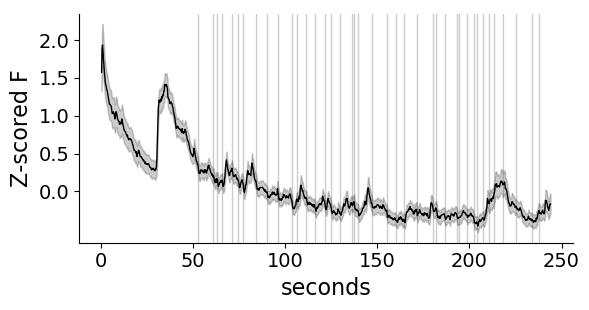

In [119]:
rows,cols = 1,1
figure(figsize=(cols*6,rows*3.2))
ax = subplot(111)


ymax = 0.1

c2 = ["gray",colors[1]]
x = collect(1:n_frames)./fps
    
ctr = 1
subplot(rows,cols,ctr)
avg = vec(mean(DF,dims=1))
stdev = vec(std(DF,dims=1))./n_fish
fill_between(x, avg.-stdev, avg.+stdev,color="black",alpha=0.2)
plot(x,avg,color="black",linewidth=1)
ctr+=1

ax.set_ylabel("Z-scored F",fontsize=fs)
ax.set_yticks([0,0.5,1,1.5,2])

ctr = 1

ax.spines["top"].set_visible(false)
ax.spines["right"].set_visible(false)
for ob in gap_times
    ax.axvline(ob/fps,0,1,color="black",linewidth=1,alpha=0.2)
end

xticks([0,50,100,150,200,250],[0,50,100,150,200,250],fontsize=14)
yticks([0,0.5,1,1.5,2.0],[0,0.5,1,1.5,2.0],fontsize=14)

xlabel("seconds",fontsize=fs)
tight_layout()

tight_layout()
#PyPlot.plt.subplots_adjust(wspace=0.2,hspace=0)

plt.savefig("figs/Fig4B.svg",dpi=300)

# Figure 4C

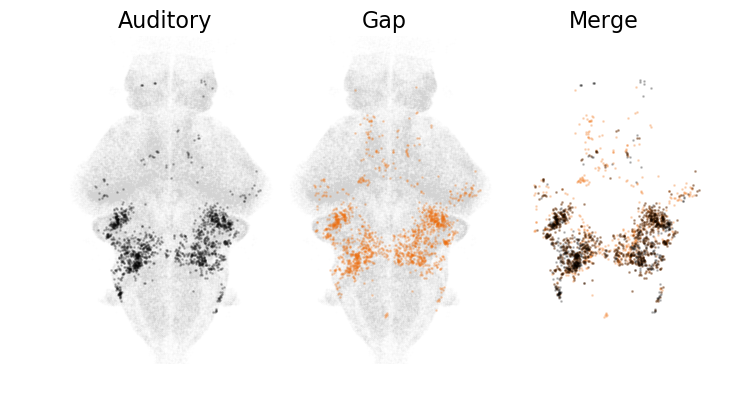

In [112]:
figure(figsize=(8.5,4.25)); 
#suptitle("500 ms gap")

a = 0.2

sr1 = sig_rois[2,:][1]
nr1 = nonsig_rois[2,:][1]
nr2 = nonsig_rois[6,:][1]
sr2 = sig_rois[6,:][1]

titles = ["Auditory","Gap","Merge"]

a = 0.2


nsa = 0.002

ax1 = subplot(131); 
scatter(centroids[nr2,2],centroids[nr2,1],color="lightgray",s=1,alpha=nsa)
scatter(centroids[sr2,2],centroids[sr2,1],color="black",s=1,alpha=a)

ax2 = subplot(132); 
scatter(centroids[nr1,2],centroids[nr1,1],color="lightgray",s=1,alpha=nsa)
scatter(centroids[sr1,2],centroids[sr1,1],color=colors[1],s=1,alpha=a)

ax3 = subplot(133); 
scatter(centroids[sr1,2],centroids[sr1,1],color=colors[1],s=1,alpha=a)
scatter(centroids[sr2,2],centroids[sr2,1],color="black",s=1,alpha=a)

ctr = 1
for ax in [ax1,ax2,ax3]
    ax.set_ylim(ymn,ymx)
    ax.set_xlim(xmn,xmx)
    ax.axis("off")
    ax.set_title(titles[ctr],fontsize=fs)
    ctr+=1
end

PyPlot.plt.subplots_adjust(wspace=0,hspace=0)

savefig("figs/Fig4C.png",dpi=300)

## Figure 4D

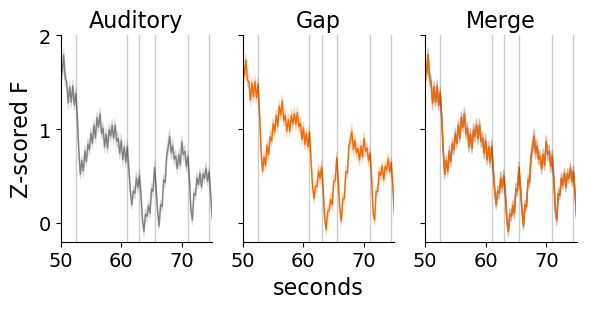

In [134]:

figure(figsize=(6,3.2))
ax1 = subplot(131)
ax2 = subplot(132)
ax3 = subplot(133)

ymax = 0.1

c2 = ["gray",colors[1]]
x = collect(1:n_frames)./fps
    
axes = [ax1,ax2,ax3]
ctr = 1
for r in [2,6]
    subplot(1,3,ctr)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    avg = vec(mean(DF[sr,:],dims=1))
    stdev = vec(std(DF[sr,:],dims=1))./n_fish
    fill_between(x, avg.-stdev, avg.+stdev,color=c2[ctr],alpha=0.2)
    plot(x,avg,color=c2[ctr],linewidth=1)
    ctr+=1
end


subplot(131); title("Auditory",fontsize=fs)
#text(202/fps,0.19,"531 Hz",color=colors[3])
#text(202/fps,0.175,"1189 Hz",color=colors[4])

#xlim(60,150)

subplot(132); title("Gap",fontsize=fs)

#xlim(60,150)

#xlim(575/fps,775/fps)

subplot(133); title("Merge",fontsize=fs)
ctr = 1
for r in [2,6]
    sr = sig_rois[2,:][1]
    sr2 = sig_rois[6,:][1]
    avg = vec(mean(DF[sr,:],dims=1))
    stdev = vec(std(DF[sr,:],dims=1))./n_fish
    fill_between(x, avg.-stdev, avg.+stdev,color=c2[ctr],alpha=0.2)
    plot(x,avg,color=c2[ctr],linewidth=1)
    ctr+=1
end

#xlim(60,150)

#xlim(900/fps,1100/fps)

ax1.set_ylabel("Z-scored F",fontsize=fs)
ax1.set_yticks([0,1,2,3])
ax1.set_yticklabels([0,1,2,3],fontsize=14)
ax2.set_yticks([0,1,2,3])
ax2.set_xlabel("seconds",fontsize=fs)

ax2.set_yticklabels(["","","","",""])
ax3.set_yticks([0,1,2,3])
ax3.set_yticklabels(["","","","",""])

ctr = 1
for ax in [ax1,ax2,ax3]
    ax.set_xlim(50,75)
    ax.set_ylim(-0.2,2)
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    for ob in gap_times
        ax.axvline(ob/fps,0,1,color="black",linewidth=1,alpha=0.2)
    end
    ax.set_xticks([50,60,70])
    ax.set_xticklabels([50,60,70],fontsize=14)
end

tight_layout()

savefig("figs/Fig4D.svg",dpi=300)

In [136]:
colors[1].*255

3-element Vector{Float64}:
 241.0
 106.0
   5.0

## Figure 4E

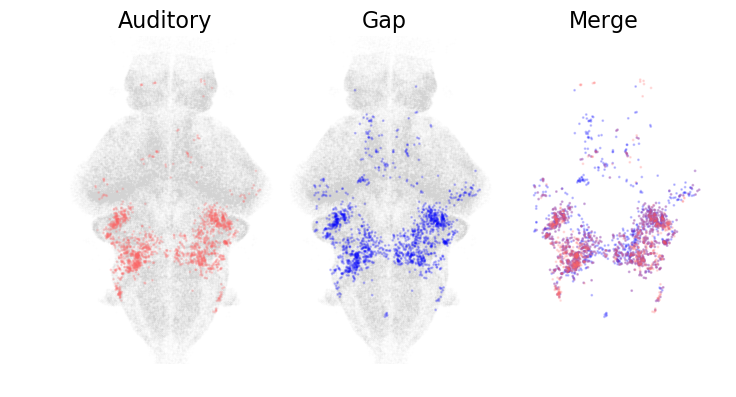

In [113]:
figure(figsize=(8.5,4.25)); 
#suptitle("500 ms gap")

a = 0.2

sr1 = sig_rois[2,:][1]
nr1 = nonsig_rois[2,:][1]
nr2 = nonsig_rois[6,:][1]
sr2 = sig_rois[6,:][1]

titles = ["Auditory","Gap","Merge"]

a = 0.2

nsa = 0.002
vm = 0.5

ax1 = subplot(131); 
scatter(centroids[nr2,2],centroids[nr2,1],c="lightgray",s=1,alpha=nsa)
scatter(centroids[sr2,2],centroids[sr2,1],c=coeffs[6,sr2],s=1,alpha=a,cmap="bwr",vmin=-vm,vmax=vm)

ax2 = subplot(132); 
scatter(centroids[nr1,2],centroids[nr1,1],c="lightgray",s=1,alpha=nsa)
scatter(centroids[sr1,2],centroids[sr1,1],c=coeffs[2,sr2],s=1,alpha=a,cmap="bwr",vmin=-vm,vmax=vm)

ax3 = subplot(133); 
scatter(centroids[sr1,2],centroids[sr1,1],c=coeffs[2,sr2],s=1,alpha=a,cmap="bwr",vmin=-vm,vmax=vm)
scatter(centroids[sr2,2],centroids[sr2,1],c=coeffs[6,sr2],s=1,alpha=a,cmap="bwr",vmin=-vm,vmax=vm)

ctr = 1
for ax in [ax1,ax2,ax3]
    ax.set_ylim(ymn,ymx)
    ax.set_xlim(xmn,xmx)
    ax.axis("off")
    ax.set_title(titles[ctr],fontsize=fs)
    ctr+=1
end

PyPlot.plt.subplots_adjust(wspace=0,hspace=0)

savefig("figs/Fig4E.png",dpi=300)

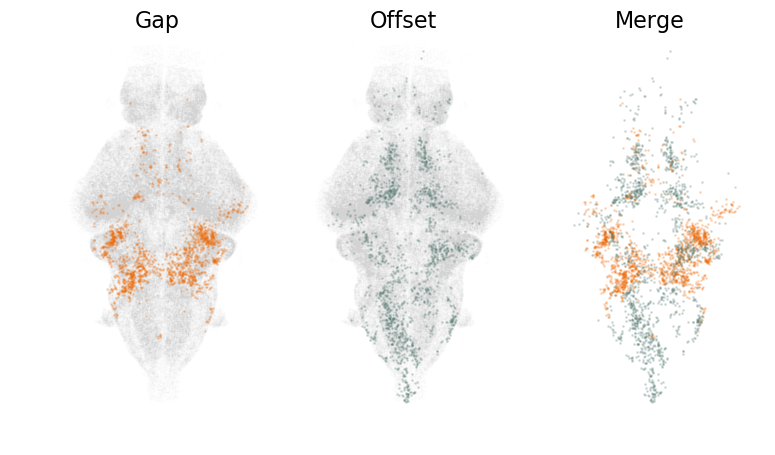

In [101]:
figure(figsize=(8.5,4.5)); 
#suptitle("500 ms gap")

a = 0.2

sr1 = sig_rois[2,:][1]
nr1 = nonsig_rois[2,:][1]
nr2 = nonsig_rois[3,:][1]
sr2 = sig_rois[3,:][1]

titles = ["Gap","Offset","Merge"]

figure(figsize=(9,5)); 
a = 0.2

nsa = 0.002

ax1 = subplot(131); 
scatter(centroids[nr1,2],centroids[nr1,1],color="lightgray",s=1,alpha=nsa)
scatter(centroids[sr1,2],centroids[sr1,1],color=colors[1],s=1,alpha=a)

ax2 = subplot(132); 
scatter(centroids[nr2,2],centroids[nr2,1],color="lightgray",s=1,alpha=nsa)
scatter(centroids[sr2,2],centroids[sr2,1],color=colors[2],s=1,alpha=a)

ax3 = subplot(133); 
scatter(centroids[sr1,2],centroids[sr1,1],color=colors[1],s=1,alpha=a)
scatter(centroids[sr2,2],centroids[sr2,1],color=colors[2],s=1,alpha=a)

ctr = 1
for ax in [ax1,ax2,ax3]
    ax.set_ylim(ymn,ymx)
    ax.set_xlim(xmn,xmx)
    ax.axis("off")
    ax.set_title(titles[ctr],fontsize=fs)
    ctr+=1
end

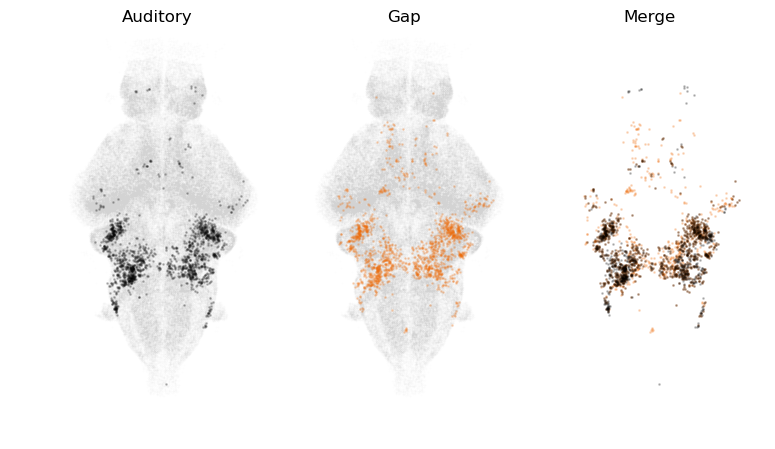

In [74]:
figure(figsize=(8.5,4.5)); 
#suptitle("500 ms gap")

a = 0.2

sr1 = sig_rois[2,:][1]
nr1 = nonsig_rois[2,:][1]
nr2 = nonsig_rois[6,:][1]
sr2 = sig_rois[6,:][1]

titles = ["Auditory","Gap","Merge"]

figure(figsize=(9,5)); 
a = 0.2


nsa = 0.002



ax1 = subplot(131); 
scatter(centroids[nr2,2],centroids[nr2,1],color="lightgray",s=1,alpha=nsa)
scatter(centroids[sr2,2],centroids[sr2,1],color="black",s=1,alpha=a)

ax2 = subplot(132); 
scatter(centroids[nr1,2],centroids[nr1,1],color="lightgray",s=1,alpha=nsa)
scatter(centroids[sr1,2],centroids[sr1,1],color=colors[1],s=1,alpha=a)

ax3 = subplot(133); 
scatter(centroids[sr1,2],centroids[sr1,1],color=colors[1],s=1,alpha=a)
scatter(centroids[sr2,2],centroids[sr2,1],color="black",s=1,alpha=a)

ctr = 1
for ax in [ax1,ax2,ax3]
    ax.set_ylim(ymn,ymx)
    ax.set_xlim(xmn,xmx)
    ax.axis("off")
    ax.set_title(titles[ctr])
    ctr+=1
end

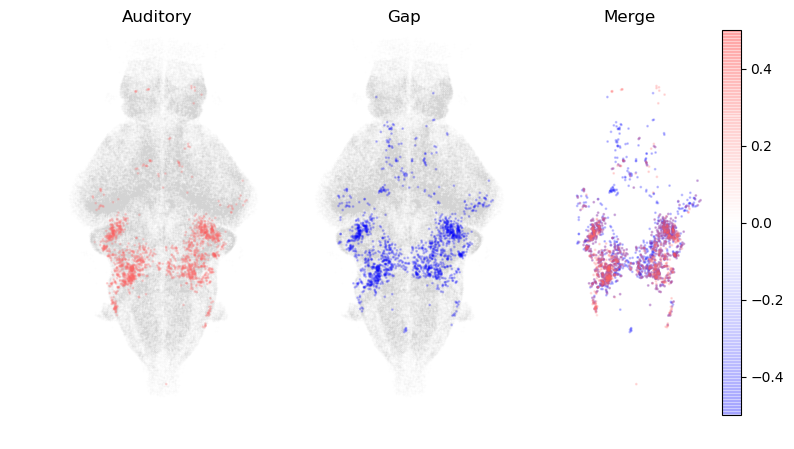

PyObject <matplotlib.colorbar.Colorbar object at 0x7f78a85d7f60>

In [79]:
figure(figsize=(9,5)); 
#suptitle("500 ms gap")

a = 0.2

sr1 = sig_rois[2,:][1]
nr1 = nonsig_rois[2,:][1]
nr2 = nonsig_rois[6,:][1]
sr2 = sig_rois[6,:][1]

titles = ["Auditory","Gap","Merge"]

figure(figsize=(9,5)); 
a = 0.2

ymn,ymx=200,1300
xmn,xmx=0,600

vm = 0.5

nsa = 0.002

cm = "bwr"

ax1 = subplot(131); 
scatter(centroids[nr2,2],centroids[nr2,1],color="lightgray",s=1,alpha=nsa)
scatter(centroids[sr2,2],centroids[sr2,1],c=coeffs[6,sr2],s=1,alpha=a,cmap=cm,vmin=-vm,vmax=vm)

ax2 = subplot(132); 
scatter(centroids[nr1,2],centroids[nr1,1],color="lightgray",s=1,alpha=nsa)
scatter(centroids[sr1,2],centroids[sr1,1],c=coeffs[2,sr1],s=1,alpha=a,cmap=cm,vmin=-vm,vmax=vm)

ax3 = subplot(133); 
scatter(centroids[sr1,2],centroids[sr1,1],c=coeffs[2,sr2],s=1,alpha=a,cmap=cm,vmin=-vm,vmax=vm)
scatter(centroids[sr2,2],centroids[sr2,1],c=coeffs[6,sr2],s=1,alpha=a,cmap=cm,vmin=-vm,vmax=vm)

ctr = 1
for ax in [ax1,ax2,ax3]
    ax.set_ylim(ymn,ymx)
    ax.set_xlim(xmn,xmx)
    ax.axis("off")
    ax.set_title(titles[ctr])
    ctr+=1
end

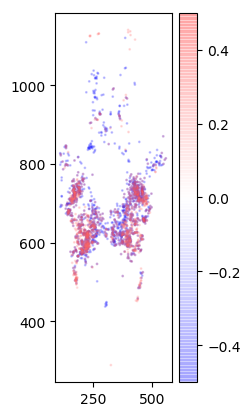

PyObject <matplotlib.colorbar.Colorbar object at 0x7f78a7d110b8>

In [81]:
ax3 = subplot(133); 
#scatter(centroids[sr1,2],centroids[sr1,1],c=coeffs[2,sr2],s=1,alpha=a,cmap=cm,vmin=-vm,vmax=vm)
#scatter(centroids[sr2,2],centroids[sr2,1],c=coeffs[6,sr2],s=1,alpha=a,cmap=cm,vmin=-vm,vmax=vm)

colorbar()

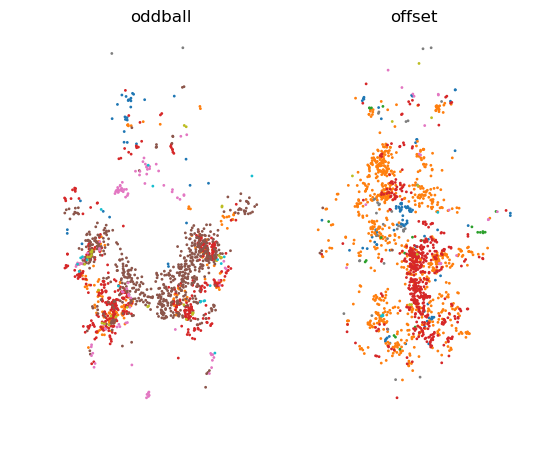

PyObject <matplotlib.collections.PathCollection object at 0x7f341510dda0>

In [250]:
figure(figsize=(6,5))

subplot(121); axis("off"); title("oddball")
scatter(centroids[sr1,2],centroids[sr1,1],c=idx_fish[sr1]/100,s=1,cmap="tab10")

subplot(122); axis("off"); title("offset")
scatter(centroids[sr2,2],centroids[sr2,1],c=idx_fish[sr2]/100,s=1,cmap="tab10")

In [63]:
n_fish = length(unique(idx_fish))

9

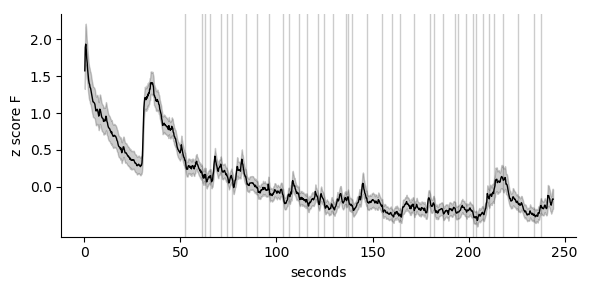

In [68]:
rows,cols = 1,1
figure(figsize=(cols*6,rows*3))
ax1 = subplot(111)


ymax = 0.1

c2 = ["gray",colors[1]]
x = collect(1:n_frames)./fps
    
axes = [ax1]
ctr = 1
    subplot(rows,cols,ctr)
    #sr = sig_rois[r,:][1]
   #nr = nonsig_rois[r,:][1]
    avg = vec(mean(DF,dims=1))
    stdev = vec(std(DF,dims=1))./n_fish
    fill_between(x, avg.-stdev, avg.+stdev,color="black",alpha=0.2)
    plot(x,avg,color="black",linewidth=1)
    ctr+=1



subplot(111)


#xlim(900/fps,1100/fps)

ax1.set_ylabel("z score F")
ax1.set_yticks([0,0.5,1,1.5,2])


ctr = 1
for ax in [ax1]
#    ax.set_ylim(0,ymax)
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    for ob in gap_times
        ax.axvline(ob/fps,0,1,color="black",linewidth=1,alpha=0.2)
    end
end

xlabel("seconds",fontsize=fs)
tight_layout()

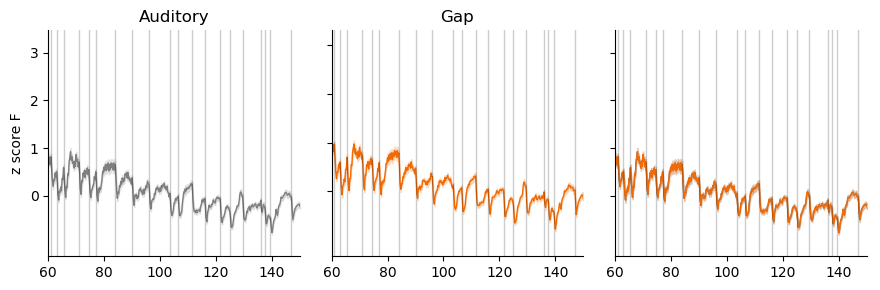

In [99]:

figure(figsize=(9,3))
ax1 = subplot(131)
ax2 = subplot(132)
ax3 = subplot(133)

ymax = 0.1

c2 = ["gray",colors[1]]
x = collect(1:n_frames)./fps
    
axes = [ax1,ax2,ax3]
ctr = 1
for r in [2,6]
    subplot(1,3,ctr)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    avg = vec(mean(DF[sr,:],dims=1))
    stdev = vec(std(DF[sr,:],dims=1))./n_fish
    fill_between(x, avg.-stdev, avg.+stdev,color=c2[ctr],alpha=0.2)
    plot(x,avg,color=c2[ctr],linewidth=1)
    ctr+=1
end


subplot(131); title("Auditory")
#text(202/fps,0.19,"531 Hz",color=colors[3])
#text(202/fps,0.175,"1189 Hz",color=colors[4])

xlim(60,150)

subplot(132); title("Gap")

xlim(60,150)

#xlim(575/fps,775/fps)

subplot(133);
ctr = 1
for r in [2,6]
    sr = sig_rois[2,:][1]
    sr2 = sig_rois[6,:][1]
    avg = vec(mean(DF[sr,:],dims=1))
    stdev = vec(std(DF[sr,:],dims=1))./n_fish
    fill_between(x, avg.-stdev, avg.+stdev,color=c2[ctr],alpha=0.2)
    plot(x,avg,color=c2[ctr],linewidth=1)
    ctr+=1
end

xlim(60,150)

#xlim(900/fps,1100/fps)

ax1.set_ylabel("z score F")
ax1.set_yticks([0,1,2,3])
ax2.set_yticks([0,1,2,3])

ax2.set_yticklabels(["","","","",""])
ax3.set_yticks([0,1,2,3])
ax3.set_yticklabels(["","","","",""])

ctr = 1
for ax in [ax1,ax2,ax3]
    #ax.set_ylim(0,ymax)
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    for ob in gap_times
        ax.axvline(ob/fps,0,1,color="black",linewidth=1,alpha=0.2)
    end
end

tight_layout()

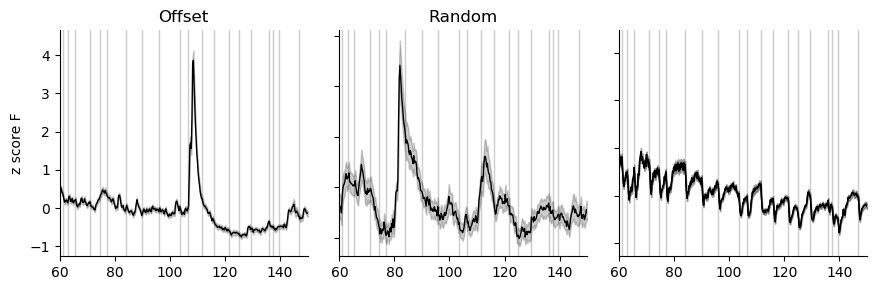

In [93]:

figure(figsize=(9,3))
ax1 = subplot(131)
ax2 = subplot(132)
ax3 = subplot(133)

ymax = 0.1

c2 = ["gray",colors[1]]
x = collect(1:n_frames)./fps
    
axes = [ax1,ax2,ax3]
ctr = 1
for r in [3,4]
    subplot(1,3,ctr)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    avg = vec(mean(DF[sr,:],dims=1))
    stdev = vec(std(DF[sr,:],dims=1))./n_fish
    fill_between(x, avg.-stdev, avg.+stdev,color="black",alpha=0.2)
    plot(x,avg,color="black",linewidth=1)
    ctr+=1
end


subplot(131); title("Offset")
#text(202/fps,0.19,"531 Hz",color=colors[3])
#text(202/fps,0.175,"1189 Hz",color=colors[4])

xlim(60,150)

subplot(132); title("Random")

xlim(60,150)

#xlim(575/fps,775/fps)

subplot(133)
ctr = 1
for r in [3,4]
    sr = sig_rois[2,:][1]
    sr2 = sig_rois[6,:][1]
    avg = vec(mean(DF[sr,:],dims=1))
    stdev = vec(std(DF[sr,:],dims=1))./n_fish
    fill_between(x, avg.-stdev, avg.+stdev,color="black",alpha=0.2)
    plot(x,avg,color="black",linewidth=1)
    ctr+=1
end

xlim(60,150)


ax1.set_ylabel("z score F")
#ax1.set_yticks([0,0.05,0.1,0.15,0.2])
#ax2.set_yticks([0,0.05,0.1,0.15,0.2],)
ax2.set_yticklabels(["","","","",""])
#ax3.set_yticks([0,0.05,0.1,0.15,0.2])
ax3.set_yticklabels(["","","","",""])

ctr = 1
for ax in [ax1,ax2,ax3]
    #ax.set_ylim(0,ymax)
    ax.spines["top"].set_visible(false)
    ax.spines["right"].set_visible(false)
    for ob in gap_times
        ax.axvline(ob/fps,0,1,color="black",linewidth=1,alpha=0.2)
    end
end

tight_layout()

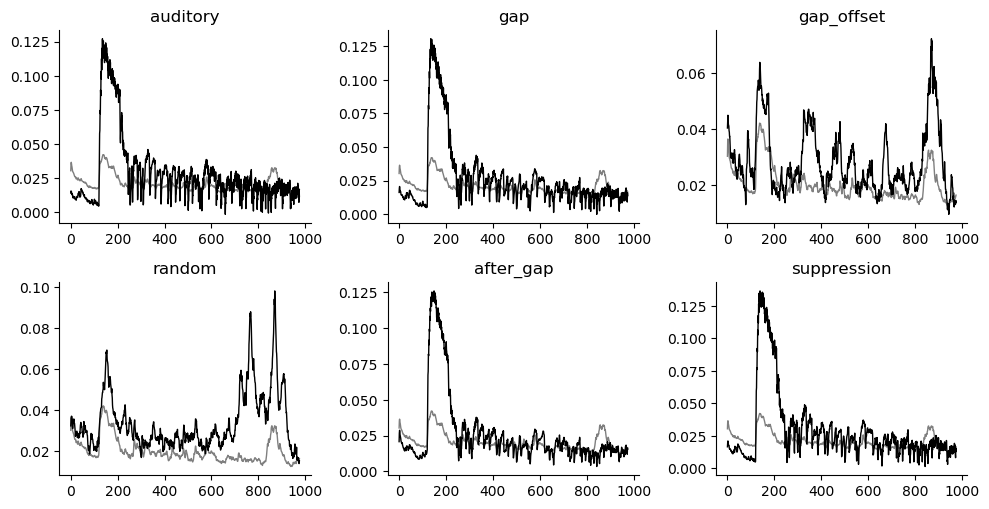

In [58]:
figure(figsize=(10,10)); 
rows,cols=4,3

r=1
for r=1:length(exp_regs)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    ax =subplot(rows,cols,r); #axis("off")
    title(reg_titles[r])
    avg = vec(mean(DF[sr,:],dims=1))
    avg_n = vec(mean(DF[nr,:],dims=1))
    plot(avg_n,color="black",linewidth=1,alpha=0.5)
    plot(avg,color="black",linewidth=1)
    ax.spines["top"].set_visible(false); ax.spines["right"].set_visible(false)
end

tight_layout()

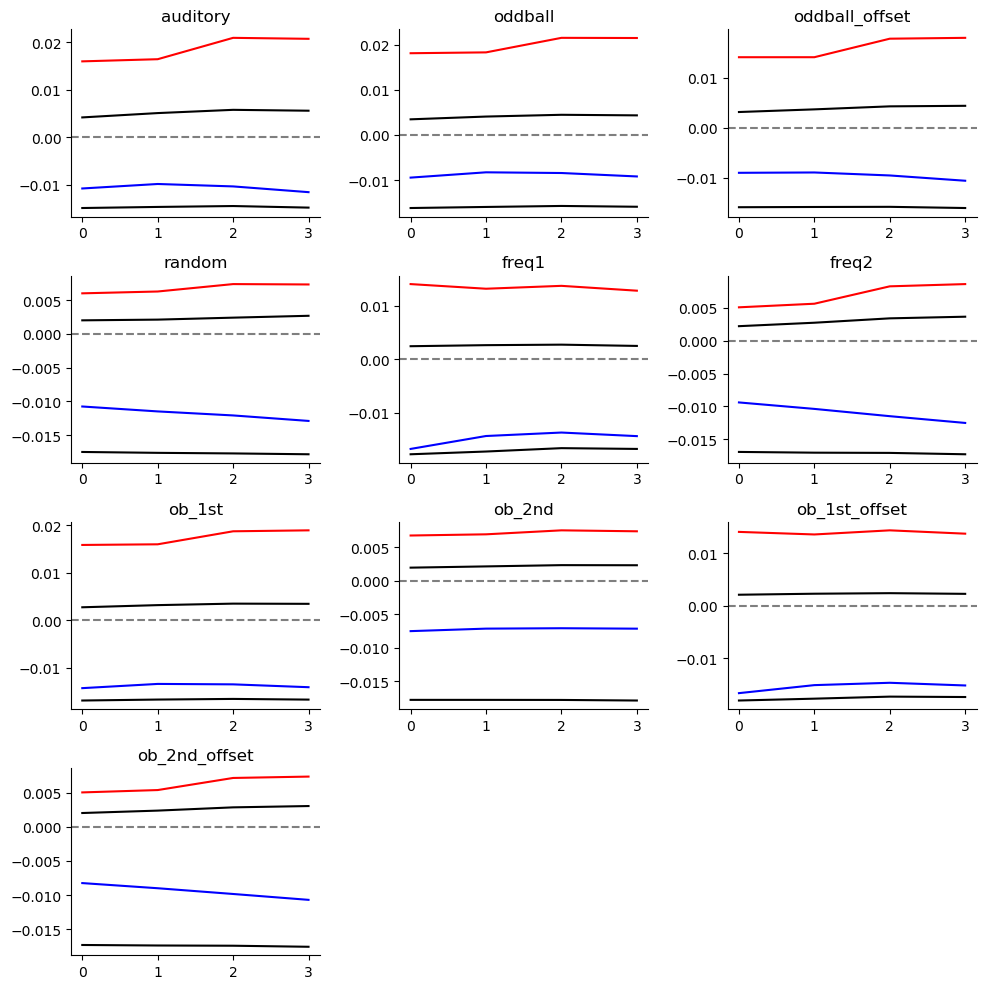

(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)(4,)

In [266]:
figure(figsize=(10,10)); 
rows,cols=4,3

r=1
for r=1:length(exp_regs)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    ax =subplot(rows,cols,r); #axis("off")
    title(reg_titles[r])
#    idx1 = findall(ob1_reg .> 0)
#    idx2 = findall(ms_f1_reg .> 0)
    #for b = 1:3
    
    #end

    #idx1 = stimtimes[stimtimes .<= block_edges[1,2]]
    avg = zeros((4))
    addn = []
    for i in oddball_1st
        addn = vec(mean(DF[sr,i:i+3],dims=1))
        avg .+= addn
    end
    plot(avg./length(idx1),color="red")

    avg = zeros((4))
    addn = []

    for i in ms_f2_times
        addn = vec(mean(DF[sr,i:i+3],dims=1))
        avg .+= addn
    end
    plot(avg./length(idx2),color="black")

    avg = zeros((4))
    addn = []
    for i in oddball_2nd
        addn = vec(mean(DF[sr,i:i+3],dims=1))
        avg .+= addn
    end
    plot(avg./length(idx1).-0.02,color="blue")

    avg = zeros((4))
    for i in ms_f1_times
        addn = vec(mean(DF[sr,i:i+3],dims=1))
        avg .+= addn
    end
    plot(avg./length(idx2).-0.02,color="black")
    axhline(0,0,1,color="black",linestyle="dashed",alpha=0.5)
    ax.spines["top"].set_visible(false); ax.spines["right"].set_visible(false)
end
tight_layout()

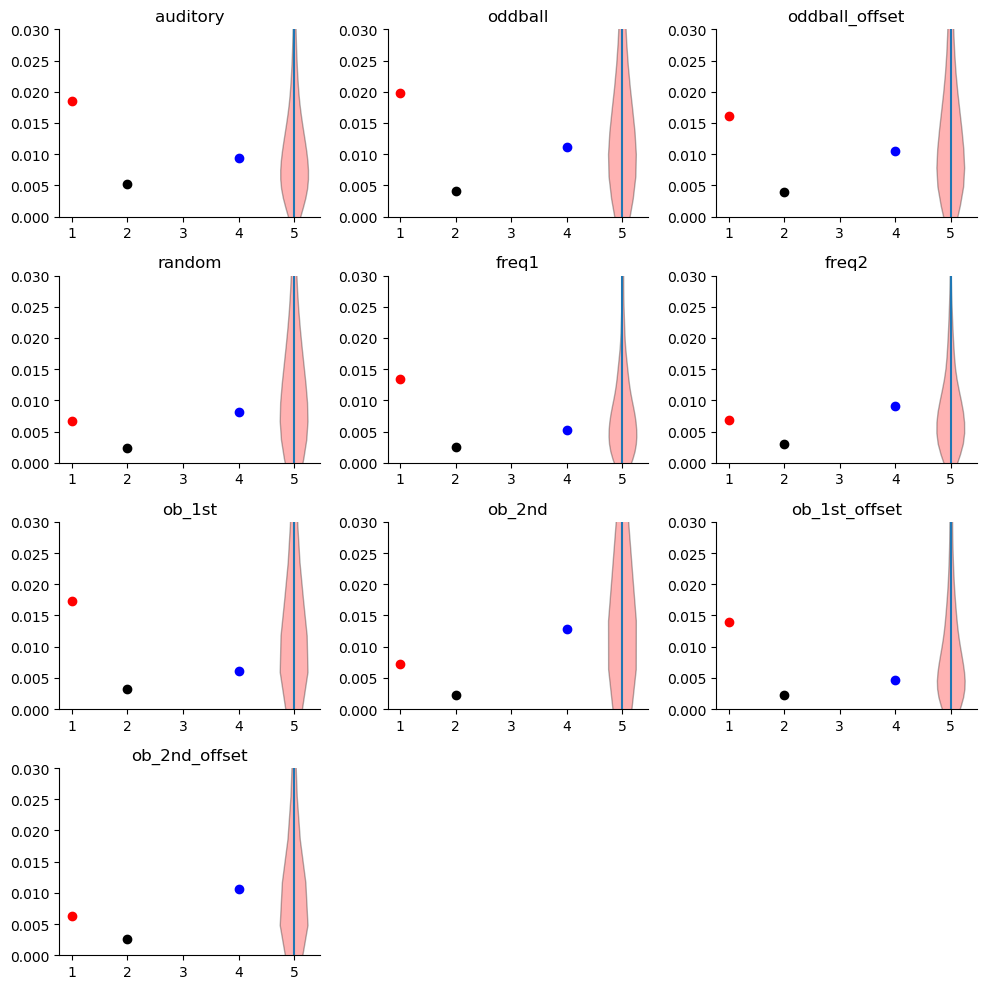

In [280]:
figure(figsize=(10,10)); 
rows,cols=4,3

r=1
for r=1:length(exp_regs)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    ax =subplot(rows,cols,r); #axis("off")
    title(reg_titles[r])

    avg = 0
    for i in oddball_1st
        addn = mean(DF[sr,i:i+3])
        avg += addn
    end
    scatter(1,avg./length(idx1),color="red")

    avg = 0

    for i in ms_f2_times
        addn = mean(DF[sr,i:i+3])
        avg += addn
    end
    scatter(2,avg./length(idx2),color="black")

    avg = 0
    for i in oddball_2nd
        addn = mean(DF[sr,i:i+3])
        avg += addn
    end
    scatter(4,avg./length(idx1),color="blue")

    avg = 0
    for i in ms_f1_times
        addn = mean(DF[sr,i:i+3])
        avg += addn
    end
    
    means = zeros(length(sr))
    ctr = 1
    for i in ms_f1_times
    for s in sr
        y = mean(DF[s,i:i+3]); means[ctr] = y; ctr+=1
    end
    
    violin_parts = plt.violinplot(means, positions=[5])#,facecolor="black")
    for pc in violin_parts["bodies"]
        pc.set_facecolor("black"); pc.set_edgecolor("black")
    end
    
    #axhline(0,0,1,color="black",linestyle="dashed",alpha=0.5)
    ax.spines["top"].set_visible(false); ax.spines["right"].set_visible(false)
    ylim(0,0.03)
end
tight_layout()

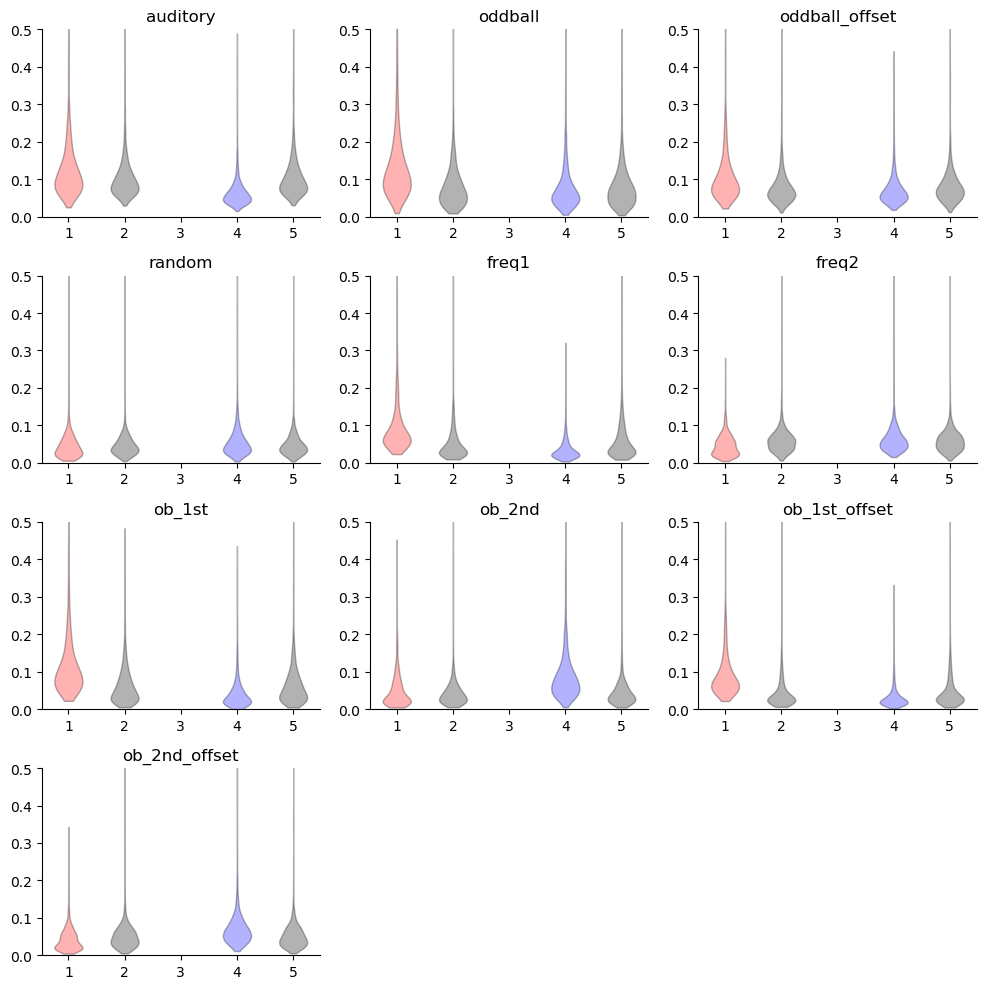

In [289]:
figure(figsize=(10,10)); 
rows,cols=4,3


function compute_mean_response(rois,stim_times)
    means = zeros(length(rois))
    for i in stim_times
        ctr = 1
        for s in rois
            y = mean(DF[s,i:i+3]); means[ctr] += y; ctr+=1
        end
    end
    means = means ./ length(stim_times)
    return means
end

r=1
for r=1:length(exp_regs)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    ax = subplot(rows,cols,r); #axis("off")
    title(reg_titles[r])

    means = compute_mean_response(sr,oddball_1st)
    violin_parts = plt.violinplot(means, positions=[1],showextrema=false)#,facecolor="black")
    for pc in violin_parts["bodies"]
        pc.set_facecolor("red"); pc.set_edgecolor("black")
    end
    
    means = compute_mean_response(sr,ms_f2_times)
    violin_parts = plt.violinplot(means, positions=[2],showextrema=false)#,facecolor="black")
    for pc in violin_parts["bodies"]
        pc.set_facecolor("black"); pc.set_edgecolor("black")
    end
    
    
    means = compute_mean_response(sr,oddball_2nd)
    violin_parts = plt.violinplot(means, positions=[4],showextrema=false)#,facecolor="black")
    for pc in violin_parts["bodies"]
        pc.set_facecolor("blue"); pc.set_edgecolor("black")
    end
    
    means = compute_mean_response(sr,ms_f1_times)
    violin_parts = plt.violinplot(means, positions=[5],showextrema=false)#,facecolor="black")
    for pc in violin_parts["bodies"]
        pc.set_facecolor("black"); pc.set_edgecolor("black")
    end
    
    ax.spines["top"].set_visible(false); ax.spines["right"].set_visible(false)
    ax.set_xticks([1,2,4,5],["f2 ob","f2 ms","f1 ob","f1 ms"])
    ylim(0,0.5)
end
tight_layout()

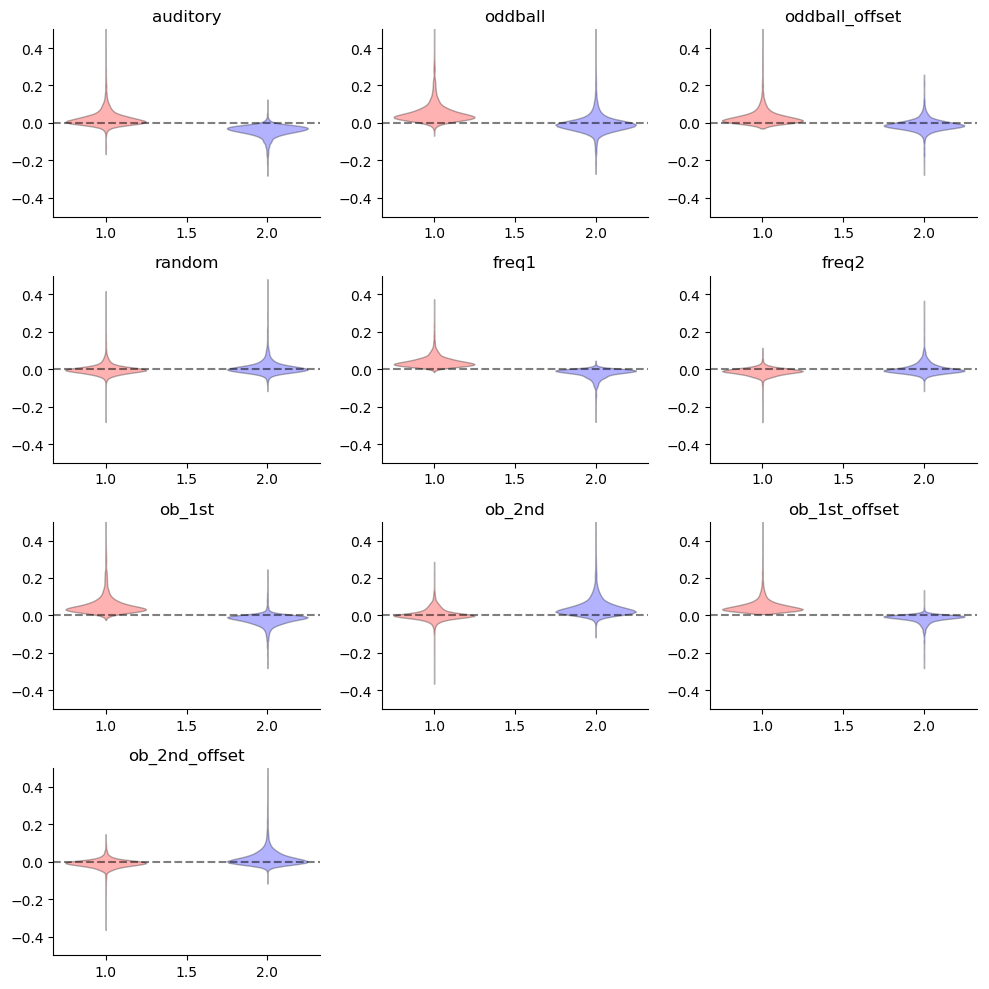

In [292]:
figure(figsize=(10,10)); 
rows,cols=4,3


function compute_mean_response(rois,stim_times)
    means = zeros(length(rois))
    for i in stim_times
        ctr = 1
        for s in rois
            y = mean(DF[s,i:i+3]); means[ctr] += y; ctr+=1
        end
    end
    means = means ./ length(stim_times)
    return means
end

r=1
for r=1:length(exp_regs)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    ax = subplot(rows,cols,r); #axis("off")
    title(reg_titles[r])

    means = compute_mean_response(sr,oddball_1st)
    means_ms = compute_mean_response(sr,ms_f2_times)

    violin_parts = plt.violinplot(means.-means_ms, positions=[1],showextrema=false)#,facecolor="black")
    for pc in violin_parts["bodies"]
        pc.set_facecolor("red"); pc.set_edgecolor("black")
    end
    
    means = compute_mean_response(sr,oddball_2nd)
    means_ms = compute_mean_response(sr,ms_f1_times)

    violin_parts = plt.violinplot(means.-means_ms, positions=[2],showextrema=false)#,facecolor="black")
    for pc in violin_parts["bodies"]
        pc.set_facecolor("blue"); pc.set_edgecolor("black")
    end

    
    ax.spines["top"].set_visible(false); ax.spines["right"].set_visible(false)
    axhline(0,0,1,linestyle="dashed",color="black",alpha=0.5)
    #ax.set_xticks([1,2,4,5],["f2 ob","f2 ms","f1 ob","f1 ms"])
    ylim(-0.5,0.5)
end
tight_layout()

In [269]:
i =20
mean(DF[sr,i:i+3])

0.012314212984921883

In [250]:
addn

4-element Vector{Float64}:
 0.008713396212049845
 0.012815271044396562
 0.03751438699958518
 0.044864150871357235

In [252]:
avg .+= addn

LoadError: DimensionMismatch("array could not be broadcast to match destination")

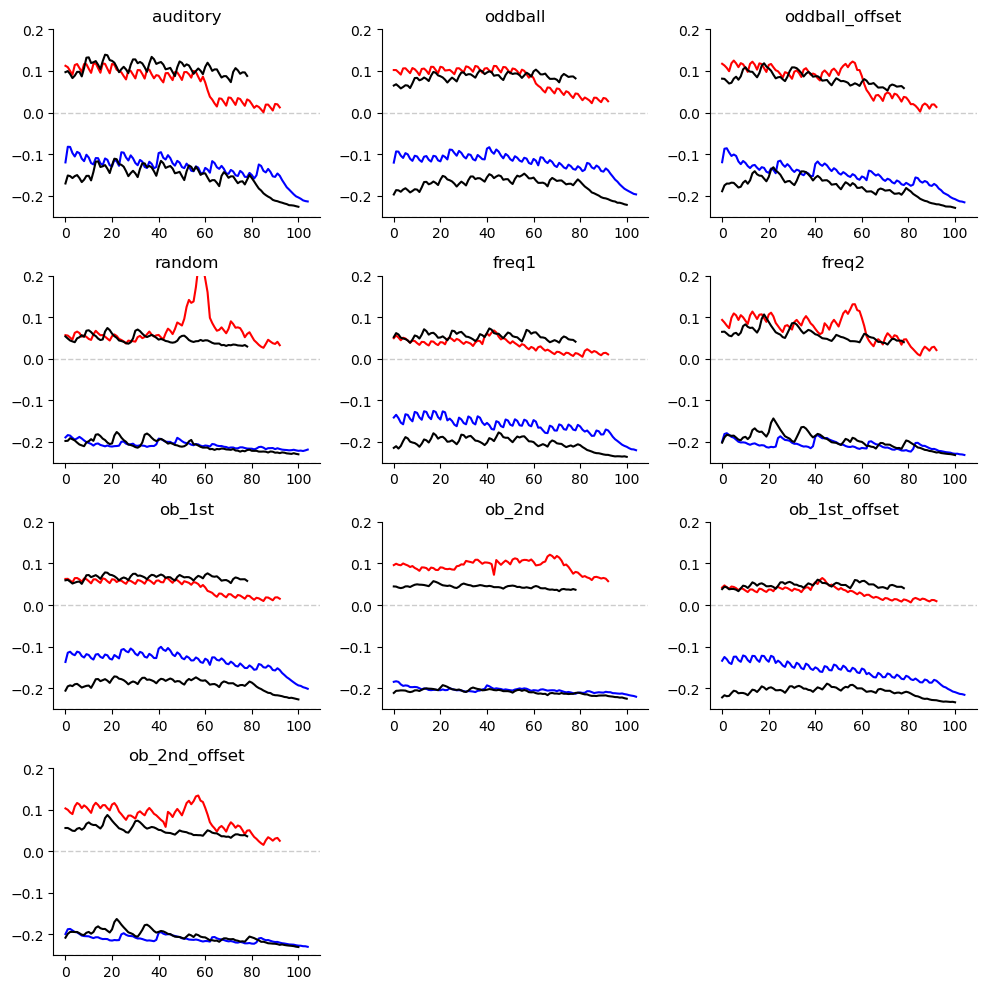

In [228]:
figure(figsize=(10,10)); 
rows,cols=4,3

r=1
for r=1:length(exp_regs)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    ax =subplot(rows,cols,r); #axis("off")
    title(reg_titles[r])
    idx1 = findall(ob2_reg .> 0)
    idx2 = findall(ms_f1_reg .> 0)

    avg = vec(mean(DF[sr,idx1],dims=1))
    plot(avg,color="red")

    avg = vec(mean(DF[sr,idx2],dims=1))
    plot(avg,color="black")

    idx1 = findall(ob1_reg .> 0)
    idx2 = findall(ms_f2_reg .> 0)

    avg = vec(mean(DF[sr,idx1],dims=1))
    plot(avg.-0.25,color="blue")

    avg = vec(mean(DF[sr,idx2],dims=1))
    plot(avg.-0.25,color="black")

    axhline(-0.25,0,1,color="black",linestyle="dashed",linewidth=1,alpha=0.2)
    axhline(0,0,1,color="black",linestyle="dashed",linewidth=1,alpha=0.2)

    ax.spines["top"].set_visible(false); ax.spines["right"].set_visible(false)
    ylim(-0.25,0.2)
end
tight_layout()

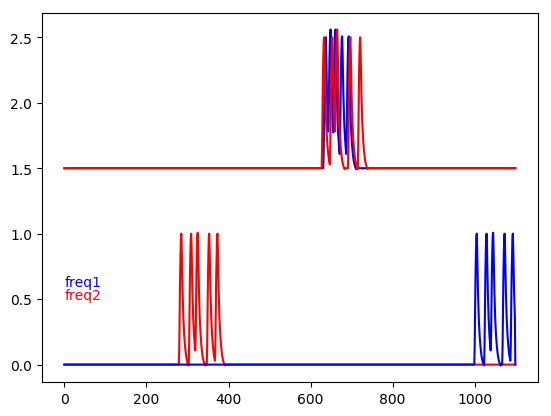

PyObject Text(0,0.5,'freq2')

In [232]:
plot(ob1_reg,color="red")
plot(ob2_reg,color="blue")
plot(ms_f1_reg.+1.5,color="blue")
plot(ms_f2_reg.+1.5,color="red")
text(0,0.6,"freq1",color="blue")
text(0,0.5,"freq2",color="red")

In [210]:
idx1 = findall(ob1_reg .> 0)

105-element Vector{Int64}:
 281
 282
 283
 284
 285
 286
 287
 288
 289
 290
 291
 292
 293
   ⋮
 380
 381
 382
 383
 384
 385
 386
 387
 388
 389
 390
 391

In [144]:
using Clustering

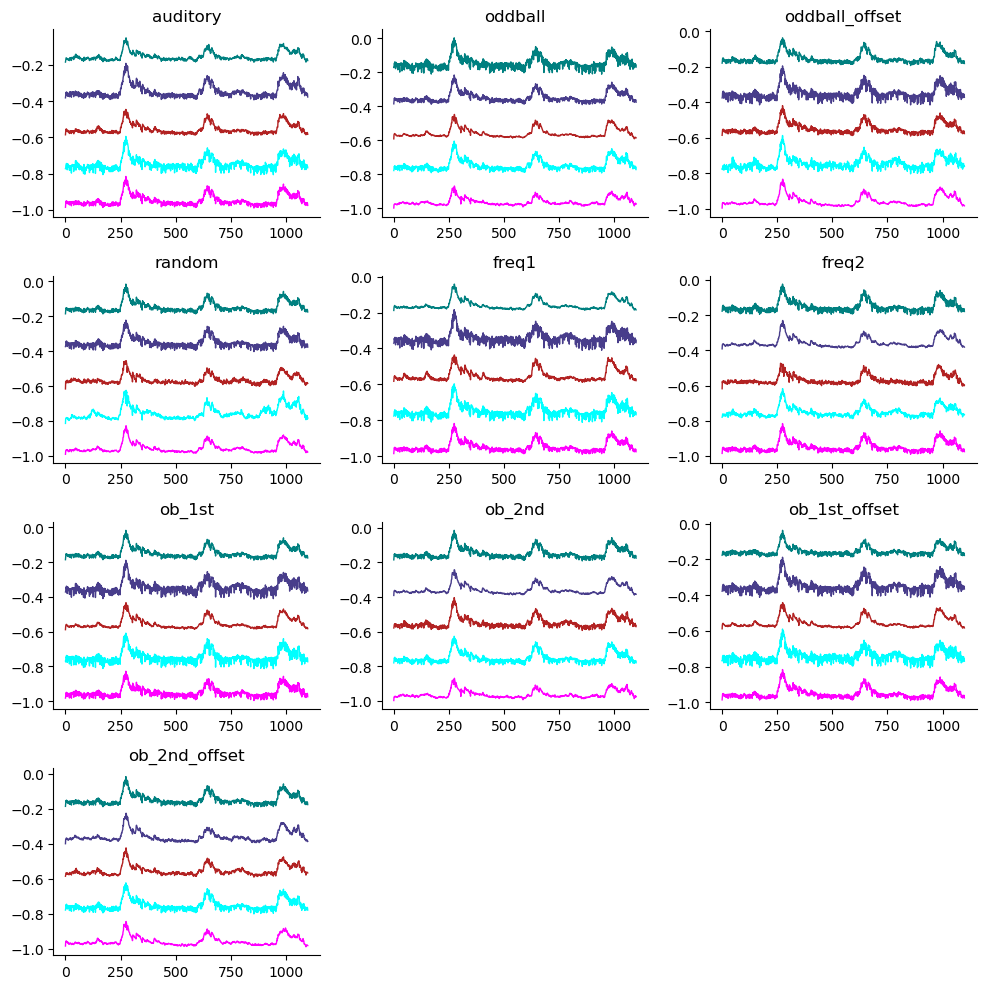

In [164]:
figure(figsize=(10,10)); 
rows,cols=4,3

colors = ["teal","darkslateblue","firebrick","cyan","magenta"]
n_clust = 5
for r=1:length(exp_regs)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    
    km = kmeans(DF[sr,:],n_clust)
    a = assignments(km)
    
    ax =subplot(rows,cols,r); #axis("off")
    title(reg_titles[r])
    for i = 1:n_clust
        idx = findall(a .== i)
        avg = vec(mean(DF[idx,:],dims=1))
        plot(avg.-i*0.2,linewidth=1,color=colors[i])
    end
    ax.spines["top"].set_visible(false); ax.spines["right"].set_visible(false)
end
tight_layout()

In [160]:
counts(km)

3-element Vector{Int64}:
 910
   1
 189

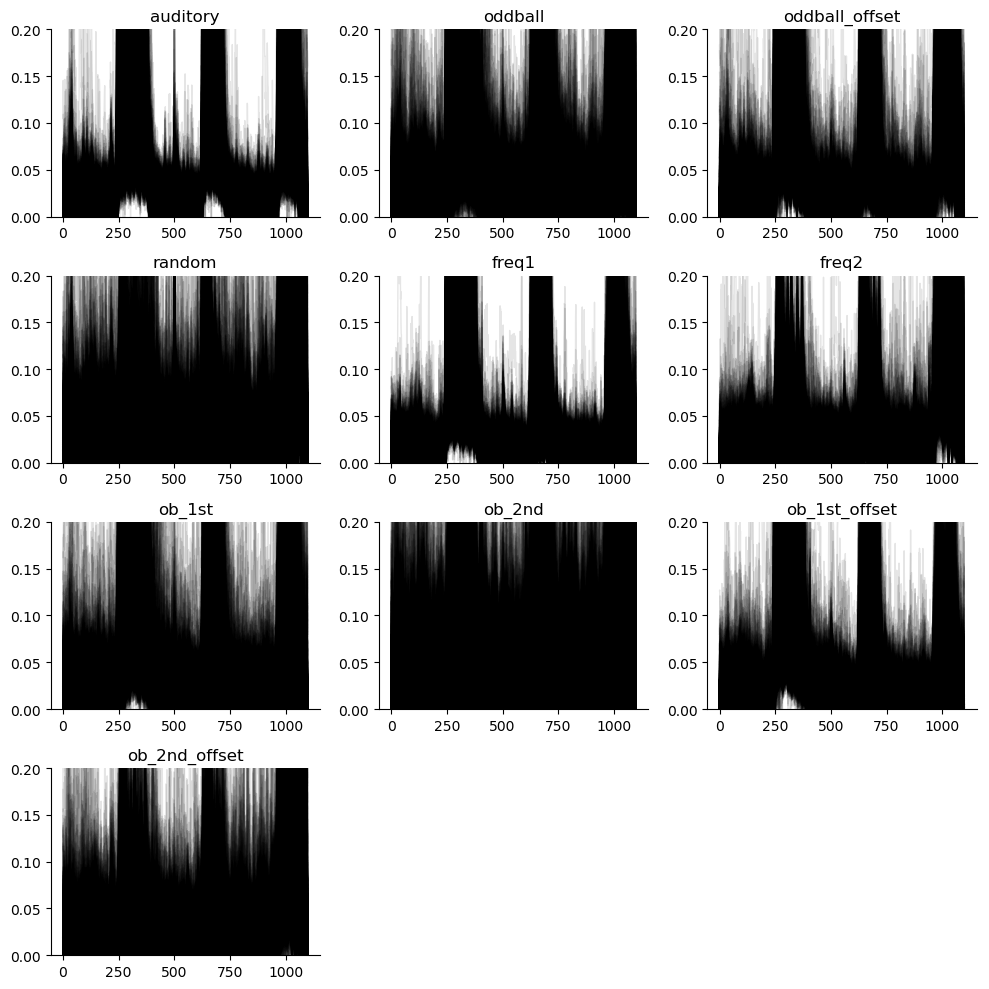

In [141]:
figure(figsize=(10,10)); 
rows,cols=4,3

r=1
for r=1:length(exp_regs)
    sr = sig_rois[r,:][1]
    nr = nonsig_rois[r,:][1]
    ax =subplot(rows,cols,r); #axis("off")
    title(reg_titles[r])
    avg = vec(mean(DF[sr,:],dims=1))
    for s in sr
        plot(DF[s,:],color="black",linewidth=1,alpha=0.1)
    end
    plot(avg,color="black",linewidth=1)
    ax.spines["top"].set_visible(false); ax.spines["right"].set_visible(false)
    ylim(0,0.2)
end

tight_layout()

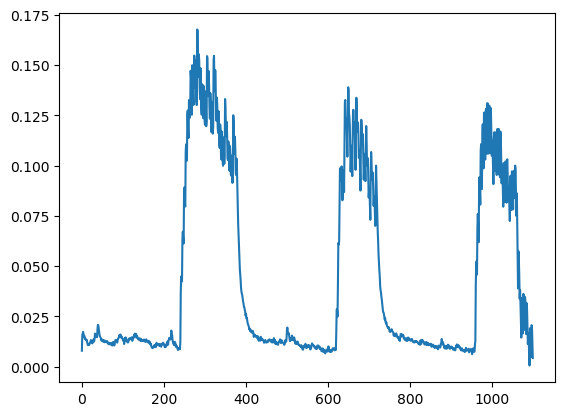

1-element Vector{PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f801cc22b70>

In [129]:
plot(vec(mean(DF[sr,:],dims=1)))

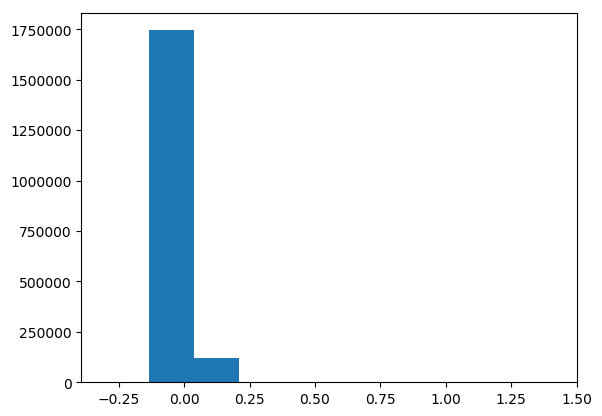

([77.0, 1.745321e6, 118936.0, 2018.0, 282.0, 80.0, 24.0, 10.0, 0.0, 2.0], Float32[-0.30705547, -0.13477132, 0.037512828, 0.20979698, 0.38208112, 0.5543653, 0.7266494, 0.8989336, 1.0712178, 1.2435019, 1.415786], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7f801def1320>, PyObject <matplotlib.patches.Rectangle object at 0x7f801def1128>, PyObject <matplotlib.patches.Rectangle object at 0x7f801def1940>, PyObject <matplotlib.patches.Rectangle object at 0x7f801def1cc0>, PyObject <matplotlib.patches.Rectangle object at 0x7f801defa080>, PyObject <matplotlib.patches.Rectangle object at 0x7f801defa400>, PyObject <matplotlib.patches.Rectangle object at 0x7f801defa780>, PyObject <matplotlib.patches.Rectangle object at 0x7f801defab00>, PyObject <matplotlib.patches.Rectangle object at 0x7f801defae80>, PyObject <matplotlib.patches.Rectangle object at 0x7f801df04240>])

In [108]:
hist(vec(coeffs))

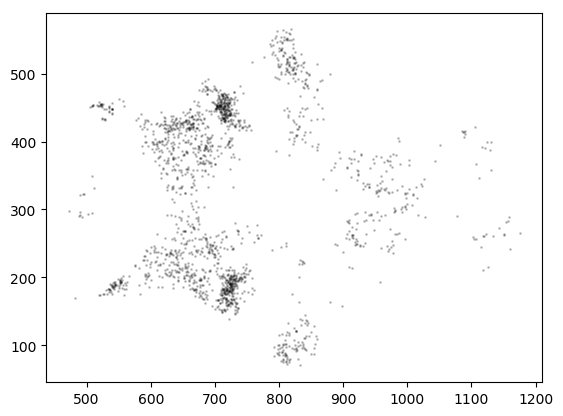

PyObject <matplotlib.collections.PathCollection object at 0x7f801f3f61d0>

In [20]:
scatter(centroids[sig_roi,1],centroids[sig_roi,2],color="black",alpha=0.2,s=1)#,bins=50)

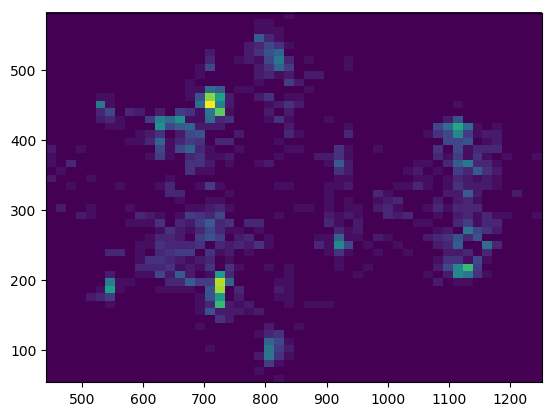

0

In [21]:
r2s_clean = replace(r2s[2,:],NaN=>0)#filter(isfinite,r2s[1,:])
sig_roi_o = findall(r2s_clean .> percentile(r2s_clean,perc_cutoff)); idx_rest = findall(r2s_clean .<= percentile(r2s_clean,perc_cutoff))
plt.hist2d(centroids[sig_roi_o,1],centroids[sig_roi_o,2],bins=50)
IJulia.clear_output()

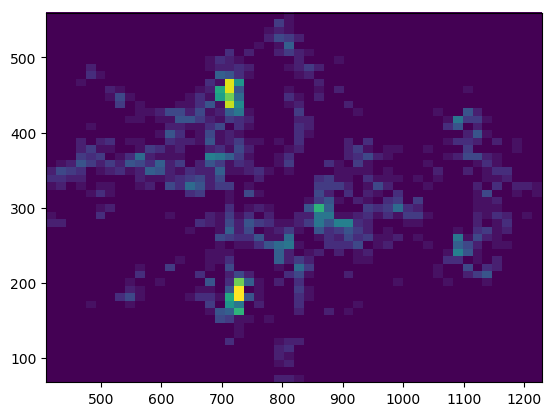

0

In [22]:
r2s_clean = replace(r2s[3,:],NaN=>0)#filter(isfinite,r2s[1,:])
sig_roi_or = findall(r2s_clean .> percentile(r2s_clean,perc_cutoff)); idx_rest = findall(r2s_clean .<= percentile(r2s_clean,perc_cutoff))
plt.hist2d(centroids[sig_roi_or,1],centroids[sig_roi_or,2],bins=50)
IJulia.clear_output()

In [23]:

#print(percentile(replace(r2s[2,:],NaN=>0),perc_cutoff));

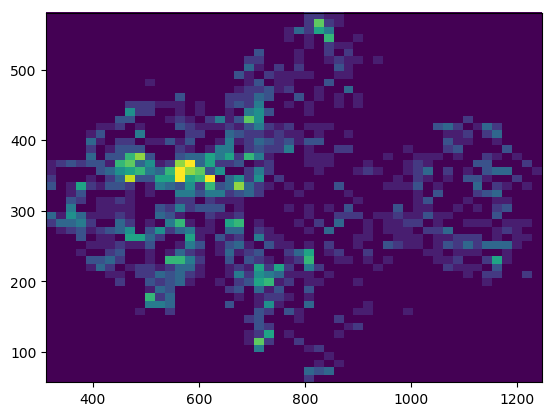

0

In [24]:
r2s_clean = replace(r2s[4,:],NaN=>0)#filter(isfinite,r2s[1,:])
sig_roi_r = findall(r2s_clean .> percentile(r2s_clean,perc_cutoff)); idx_rest = findall(r2s_clean .<= percentile(r2s_clean,perc_cutoff))
plt.hist2d(centroids[sig_roi_r,1],centroids[sig_roi_r,2],bins=50)
IJulia.clear_output()

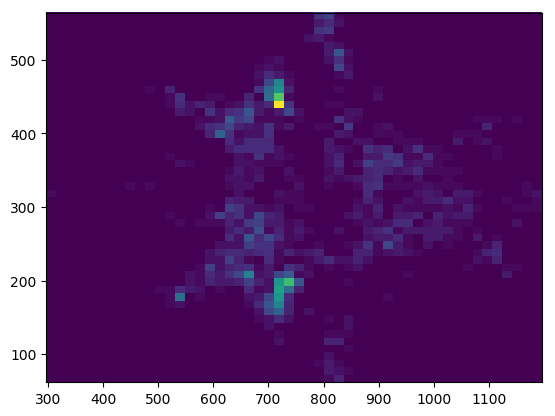

0

In [57]:
r2s_clean = replace(r2s[5,:],NaN=>0)#filter(isfinite,r2s[1,:])
f1_roi = findall(r2s_clean .> percentile(r2s_clean,perc_cutoff)); idx_rest = findall(r2s_clean .<= percentile(r2s_clean,perc_cutoff))
plt.hist2d(centroids[f1_roi,1],centroids[f1_roi,2],bins=50)
IJulia.clear_output()

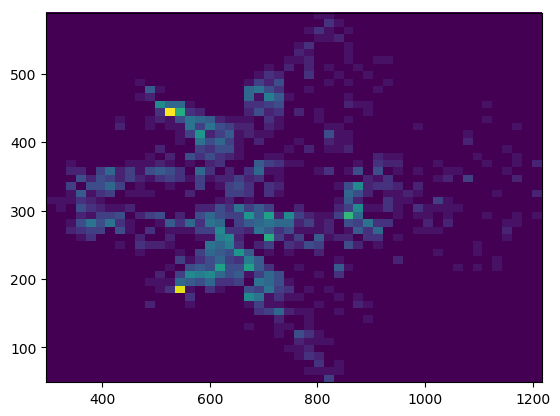

0

In [58]:
r2s_clean = replace(r2s[6,:],NaN=>0)#filter(isfinite,r2s[1,:])
f2_roi = findall(r2s_clean .> percentile(r2s_clean,perc_cutoff)); idx_rest = findall(r2s_clean .<= percentile(r2s_clean,perc_cutoff))
plt.hist2d(centroids[f2_roi,1],centroids[f2_roi,2],bins=50)
IJulia.clear_output()

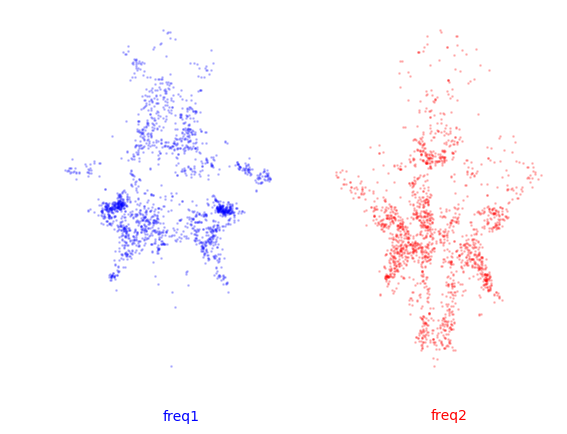

PyObject Text(300,150,'freq2')

In [67]:
subplot(121); axis("off")
scatter(centroids[f1_roi,2],centroids[f1_roi,1],color="blue",alpha=0.2,s=1)
text(300,150,"freq1",color="blue")

subplot(122);axis("off")
scatter(centroids[f2_roi,2],centroids[f2_roi,1],color="red",alpha=0.2,s=1)
text(300,150,"freq2",color="red")

In [69]:
for r = 1:6
    print(percentile(replace(r2s[r,:],NaN=>0),perc_cutoff));
    print("\n")
end

0.6413923549652104
0.14790072888135927
0.22842676460742956
0.09954852342605637
0.6085643458366394
0.4006619101762785


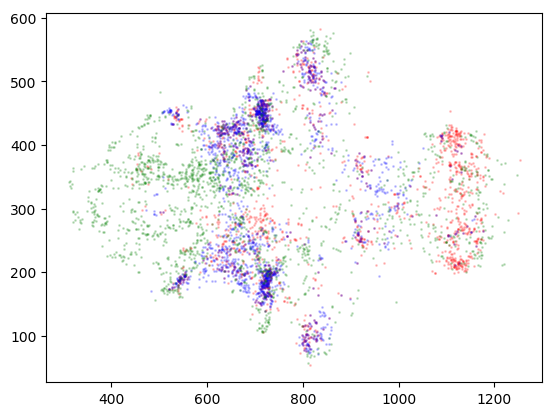

PyObject <matplotlib.collections.PathCollection object at 0x7f801f39a320>

In [28]:
scatter(centroids[sig_roi_o,1],centroids[sig_roi_o,2],color="red",alpha=0.2,s=1)#,bins=50)
scatter(centroids[sig_roi,1],centroids[sig_roi,2],color="blue",alpha=0.2,s=1)#,bins=50)
scatter(centroids[sig_roi_r,1],centroids[sig_roi_r,2],color="green",alpha=0.2,s=1)

In [29]:
oddball_only = []
for roi in sig_roi_o
    if roi in sig_roi
        continue
    else
        append!(oddball_only,roi)
    end
end

offset_only = []
for roi in sig_roi_or
    if roi in sig_roi
        continue
    else
        append!(offset_only,roi)
    end
end

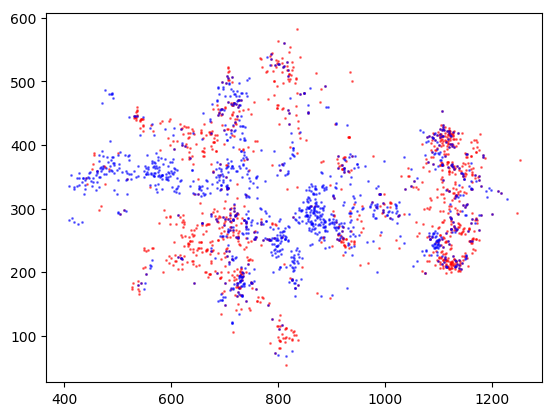

PyObject <matplotlib.collections.PathCollection object at 0x7f801e8b8c18>

In [71]:
scatter(centroids[oddball_only,1],centroids[oddball_only,2],color="red",alpha=0.5,s=1)#,bins=50)
scatter(centroids[offset_only,1],centroids[offset_only,2],color="blue",alpha=0.5,s=1)

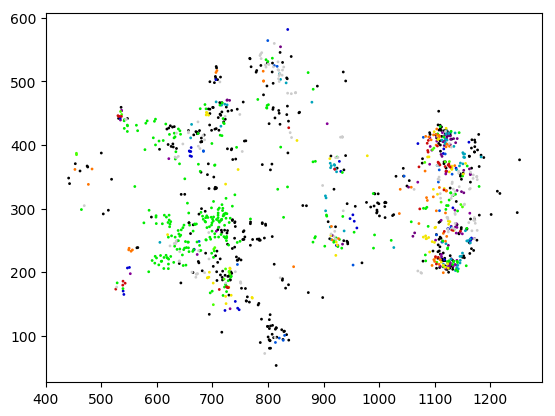

PyObject <matplotlib.collections.PathCollection object at 0x7f801f1c44e0>

In [31]:
#idx_fish
scatter(centroids[oddball_only,1],centroids[oddball_only,2],c=idx_fish[oddball_only]/100,s=1,cmap="spectral")#,bins=50)

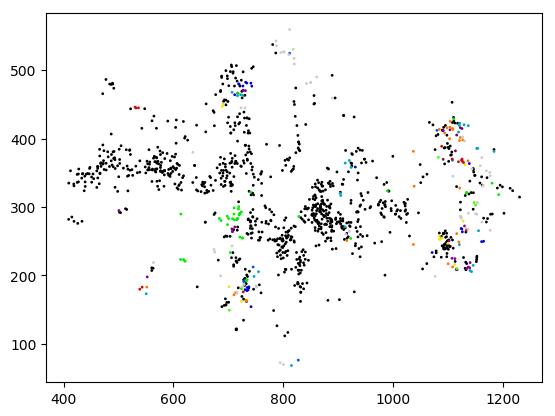

PyObject <matplotlib.collections.PathCollection object at 0x7f801f128c18>

In [32]:
scatter(centroids[offset_only,1],centroids[offset_only,2],c=idx_fish[offset_only]/100,s=1,cmap="spectral")#,bins=50)


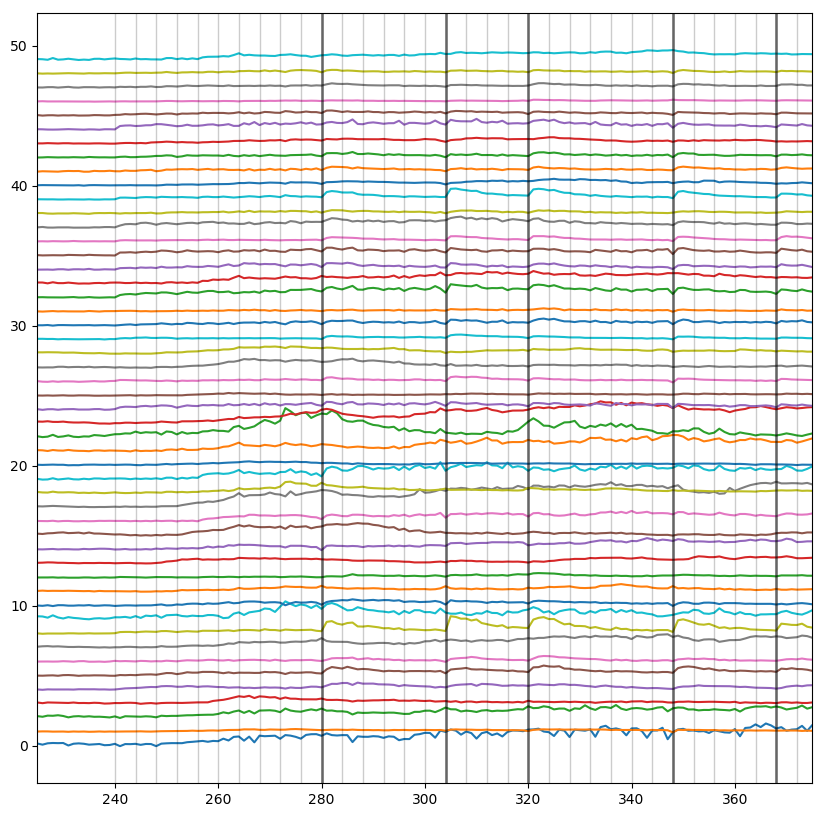

(225, 375)

In [57]:
figure(figsize=(10,10))

ctr = 0
for roi in sig_roi_o[1:50]
    plot(DF[roi,:].*2 .+ctr)
    ctr+=1
end

#x=collect(1:1100)
for stim in stimtimes
    axvline(stim,0,1,color="black",alpha=0.2,linewidth=1)
end

for oddball in oddball_times
    axvline(oddball,0,1,color="black",alpha=0.5,linewidth=2)
end

xlim(225,375)
#scatter(oddball_times,zeros(length(oddball_times)))

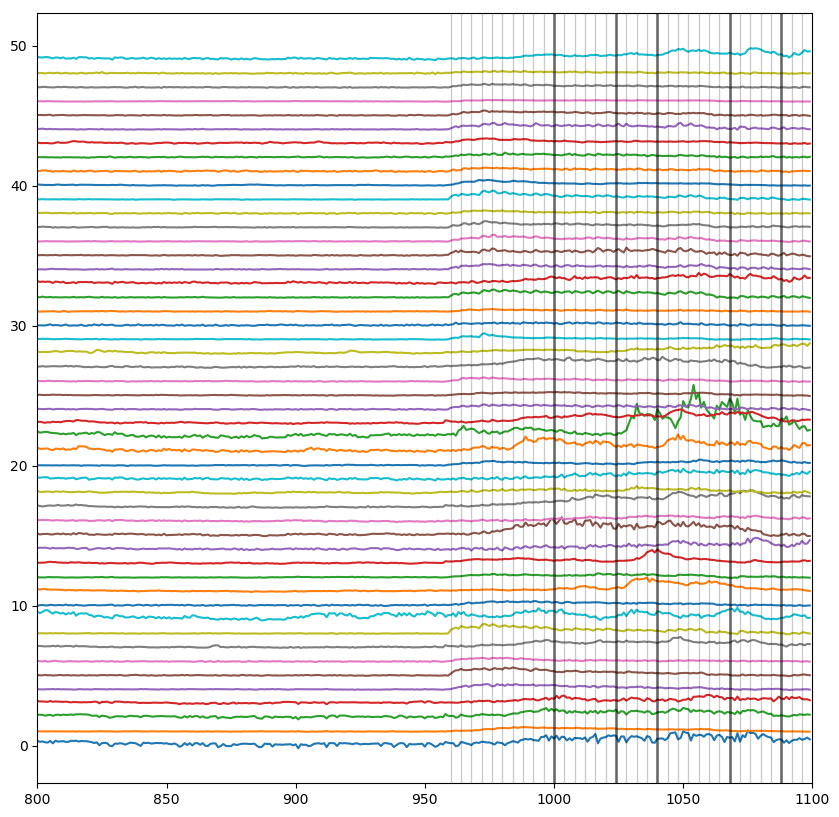

(800, 1100)

In [58]:
figure(figsize=(10,10))

ctr = 0
for roi in sig_roi_o[1:50]
    plot(DF[roi,:].*2 .+ctr)
    ctr+=1
end

#x=collect(1:1100)
for stim in stimtimes
    axvline(stim,0,1,color="black",alpha=0.2,linewidth=1)
end

for oddball in oddball_times
    axvline(oddball,0,1,color="black",alpha=0.5,linewidth=2)
end

xlim(800,1100)

In [64]:
#for i =1:total_rois
exp_regs = [auditory_reg,oddball_reg]
coeffs = Array{Float32}(undef,length(exp_regs),total_rois); fill!(coeffs,NaN)
r2s = Array{Float32}(undef,length(exp_regs),total_rois); fill!(r2s,NaN)
t = now()
print("starting $t ...")
for i = 1:total_rois
    reg_ctr = 1
    yr = DF[i,:]
    xr = auditory_reg
    df = DataFrame([yr,xr],["y","x"])
    ols = lm(@formula(y ~ x),df)
    if r2(ols) > 1
        continue
    end
    r2s[reg_ctr,i] = r2(ols)
    coeffs[reg_ctr,i] = coef(ols)[2]
    reg_ctr +=1
end
t = now()
print("complete $t")

starting 2024-02-15T15:42:12.948 ...complete 2024-02-15T15:42:28.626

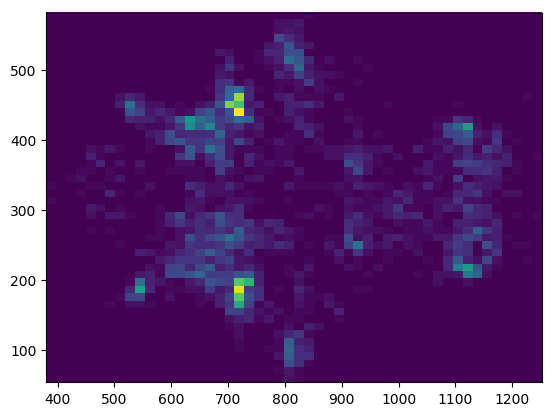

0

In [71]:
perc_cutoff = 98
r2s_clean = replace(r2s[1,:],NaN=>0)#filter(isfinite,r2s[1,:])
sig_roi = findall(r2s_clean .> percentile(r2s_clean,perc_cutoff)); idx_rest = findall(r2s_clean .<= percentile(r2s_clean,perc_cutoff))
plt.hist2d(centroids[sig_roi,1],centroids[sig_roi,2],bins=50)
IJulia.clear_output()

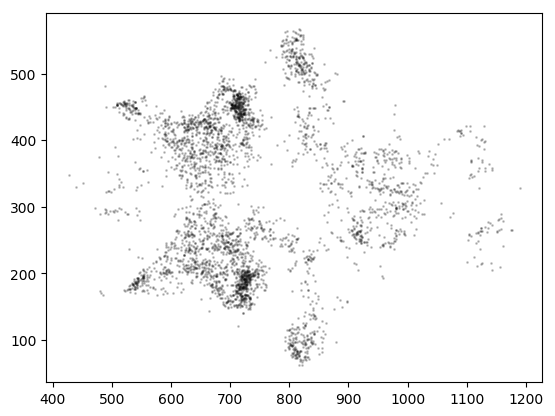

PyObject <matplotlib.collections.PathCollection object at 0x7fa3d7029710>

In [66]:
scatter(centroids[sig_roi,1],centroids[sig_roi,2],color="black",alpha=0.2,s=1)#,bins=50)

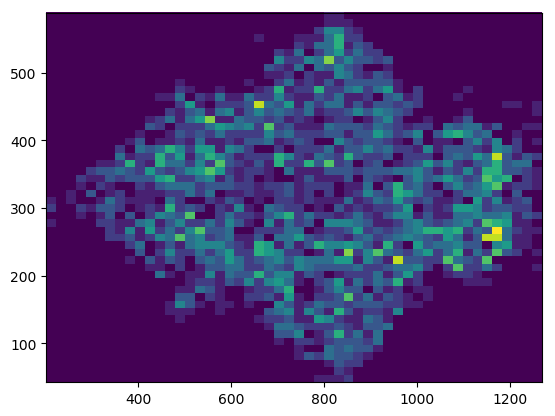

0

In [44]:
perc_cutoff = 95
r2s_clean = replace(r2s[2,:],NaN=>missing)#filter(isfinite,r2s[1,:])
sig_roi = findall(r2s_clean .> percentile(r2s_clean,perc_cutoff)); idx_rest = findall(r2s_clean .<= percentile(r2s_clean,perc_cutoff))
plt.hist2d(centroids[sig_roi,1],centroids[sig_roi,2],bins=50)
IJulia.clear_output()

In [45]:
sig_roi = findall(r2s_clean .> percentile(r2s_clean,perc_cutoff));

In [46]:
plt.scatter(centroids[:,1],centroids[:,2],bins=50)

LoadError: PyError ($(Expr(:escape, :(ccall(#= /home/stednitz/.julia/packages/PyCall/L0fLP/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError('Unknown property bins',)
  File "/usr/lib/python3/dist-packages/matplotlib/pyplot.py", line 3378, in scatter
    edgecolors=edgecolors, data=data, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/__init__.py", line 1718, in inner
    return func(ax, *args, **kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/axes/_axes.py", line 4032, in scatter
    collection.update(kwargs)
  File "/usr/lib/python3/dist-packages/matplotlib/artist.py", line 902, in update
    for k, v in props.items()]
  File "/usr/lib/python3/dist-packages/matplotlib/artist.py", line 902, in <listcomp>
    for k, v in props.items()]
  File "/usr/lib/python3/dist-packages/matplotlib/artist.py", line 895, in _update_property
    raise AttributeError('Unknown property %s' % k)


In [47]:
maximum(r2s_clean)

4.5037362f30

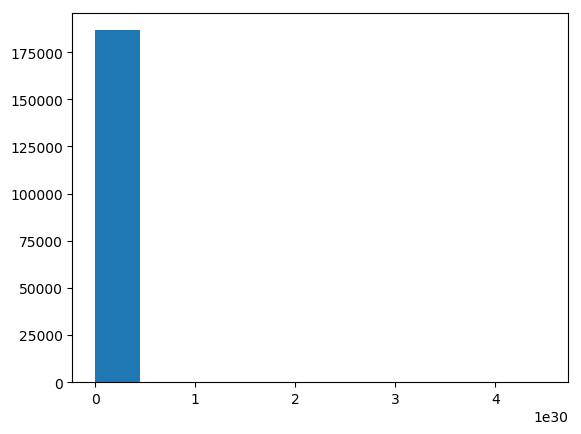

([186674.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0], Float32[-1.1492887, 4.503736f29, 9.007472f29, 1.3511209f30, 1.8014944f30, 2.2518681f30, 2.7022418f30, 3.1526153f30, 3.6029888f30, 4.0533627f30, 4.5037362f30], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7fa3d96a9ba8>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3d96397b8>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3d96a96a0>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3d96a9898>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3d9681c18>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3d9681278>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3d96819b0>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3d96817b8>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3dc09b470>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3dc09bd30>])

In [48]:
hist(vec(r2s[2,:]))

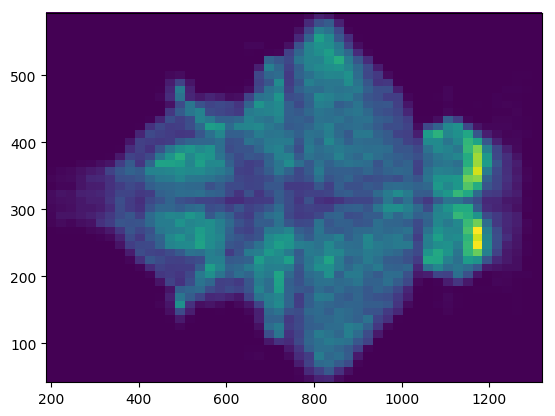

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [188.72000000000003, 211.36201800000003, 234.004036, 256.64605400000005, 279.288072, 301.93009, 324.572108, 347.21412599999996, 369.856144, 392.498162  …  1117.0427379999999, 1139.6847559999999, 1162.326774, 1184.968792, 1207.61081, 1230.252828, 1252.894846, 1275.536864, 1298.178882, 1320.8209], [42.0476, 53.082068, 64.116536, 75.151004, 86.185472, 97.21994, 108.254408, 119.28887599999999, 130.323344, 141.357812  …  494.4607879999999, 505.4952559999999, 516.529724, 527.5641919999999, 538.59866, 549.6331279999999, 560.6675959999999, 571.702064, 582.7365319999999, 593.771], PyObject <matplotlib.image.AxesImage object at 0x7fa3dc0705f8>)

In [23]:
plt.hist2d(centroids[:,1],centroids[:,2],bins=50)


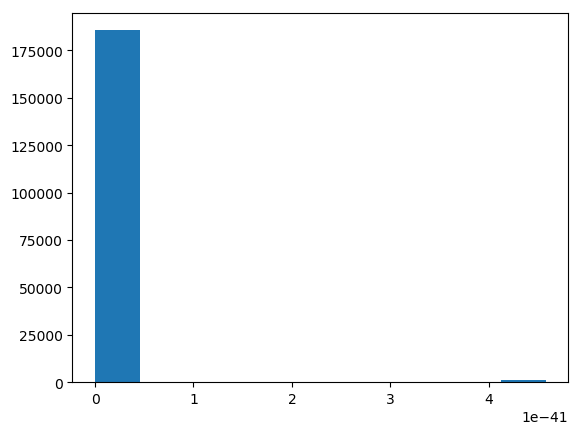

([185687.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 988.0], Float32[0.0, 4.58f-42, 9.157f-42, 1.3737f-41, 1.8316f-41, 2.2894f-41, 2.7474f-41, 3.2053f-41, 3.6633f-41, 4.1211f-41, 4.579f-41], PyCall.PyObject[PyObject <matplotlib.patches.Rectangle object at 0x7fa3ec24cdd8>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3ec24ca58>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3f42af2b0>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3f42af470>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3f42afba8>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3ec22feb8>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3ec22f128>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3ec22fc50>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3ec22f4a8>, PyObject <matplotlib.patches.Rectangle object at 0x7fa3f4289828>])

In [21]:
hist(vec(r2s_clean))#[2,:])

In [22]:
percentile(r2s_clean,perc_cutoff)

0.0

In [60]:
length(sig_roi)

0

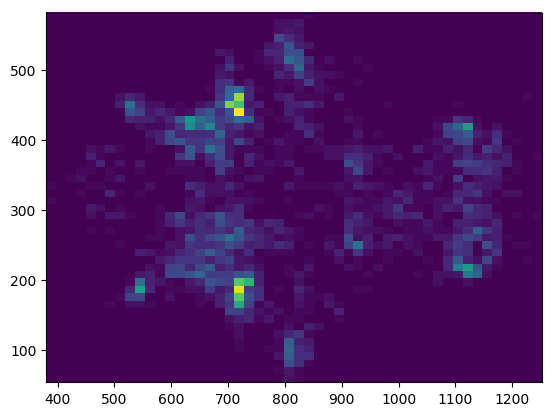

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [379.9100000000001, 397.35854000000006, 414.8070800000001, 432.2556200000001, 449.70416000000006, 467.1527000000001, 484.6012400000001, 502.04978000000006, 519.49832, 536.94686  …  1095.3001399999998, 1112.7486800000001, 1130.19722, 1147.6457599999999, 1165.0943, 1182.54284, 1199.99138, 1217.43992, 1234.8884600000001, 1252.337], [53.1851, 63.751177999999996, 74.317256, 84.88333399999999, 95.449412, 106.01549, 116.581568, 127.14764599999998, 137.71372399999998, 148.279802  …  486.39429799999994, 496.96037599999994, 507.52645399999994, 518.092532, 528.65861, 539.224688, 549.790766, 560.356844, 570.922922, 581.489], PyObject <matplotlib.image.AxesImage object at 0x7f7438985128>)

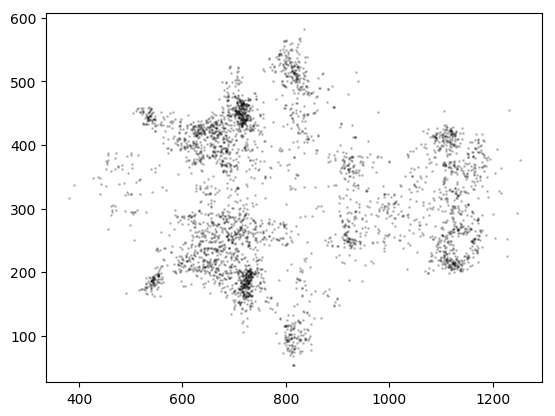

PyObject <matplotlib.collections.PathCollection object at 0x7f74389636d8>

In [57]:
scatter(centroids[sig_roi,1],centroids[sig_roi,2],color="black",alpha=0.2,s=1)#,bins=50)

In [154]:
size(centroids)

(186675, 3)

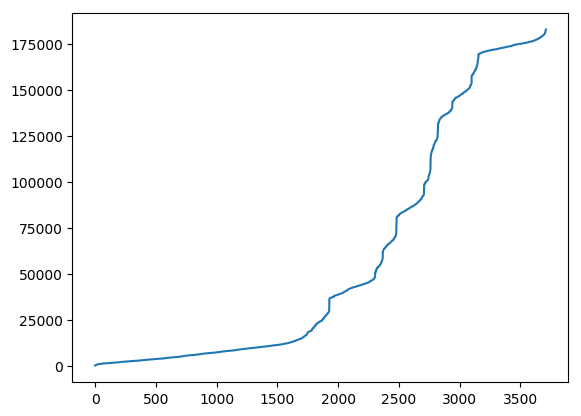

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7f410d5f10f0>

In [155]:
plot(sig_roi)

In [81]:
#for roi in sig_roi
#    scatter(centroids[roi,1],centroids[roi,2],color="black",alpha=0.5, s=1)
#end

LoadError: InterruptException:

In [64]:
length(r2s)

186675

In [9]:
    coeffs = Array{Float32}(undef,length(exp_reg_titles),total_rois)
    r2s = Array{Float32}(undef,length(exp_reg_titles),total_rois)
    reg_ctr = 0
    for regressor in exp_regs
        reg_ctr +=1
        title = exp_reg_titles[reg_ctr]
        print("regressing $title ... ")
        for i =1:total_rois
            yr = A_corr[:,i]
            xr = regressor
            good_idx = findall(isfinite.(yr) .== 1)
            try
                df = DataFrame([yr[good_idx],xr[good_idx]],["y","x"])
                ols = lm(@formula(y ~ x),df)
                r2s[reg_ctr,i] = r2(ols)
                coeffs[reg_ctr,i] = coef(ols)[2]
            catch
                r2s[reg_ctr,i] = NaN
                coeffs[reg_ctr,i] = NaN
            end
        end
    end
    
    print("Computing percentiles and saving state regressions...")
    for i = 1:length(exp_reg_titles)
        title = exp_reg_titles[i]; create_group(reg_f,title)
        reg_f[title]["r2"]=r2s[i,:]; reg_f[title]["coef"]=coeffs[i,:]
    end
    
    for i = 1:length(exp_reg_titles)
        title=exp_reg_titles[i]*"_perc"
        diff = r2s[i,:]
        idx_95 = findall(diff .> percentile(diff,perc_cutoff)); idx_rest = findall(diff .<= percentile(diff,perc_cutoff))
        reg_f[title] = idx_95
    end

LoadError: MethodError: no method matching getindex(::HDF5.Group)
[0mClosest candidates are:
[0m  getindex(::Union{HDF5.File, HDF5.Group}, [91m::HDF5.Reference[39m) at ~/.julia/packages/HDF5/t07BK/src/HDF5.jl:1027
[0m  getindex(::Union{HDF5.File, HDF5.Group}, [91m::AbstractString[39m; pv...) at ~/.julia/packages/HDF5/t07BK/src/HDF5.jl:519